**Pregunta 3**

In [1]:
import keras

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Parte a)

In [2]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test=x_test.astype('float32')/255
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

El conjunto de validación es definido implícitamente utilizando el argumento *validation_split* de la función de entrenamiento, el cuál toma el porcentaje indicado para utilizar como validación. Este corte es hecho desde el final del conjunto de entrenamiento, por lo tanto se cumple con que se utilicen las últimas 5,000 imágenes del conjunto.

In [3]:
val_percent=5000/60000

**Pregunta 3.1**

Parte a)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
x_train.shape

(60000, 784)

La función de pérdida elegida es *MSE*, pues la salida de la red neuronal va a ser la reconstrucción de la imagen original y la comparación será hecha entre ambas imágenes en general. Este último aspecto es reflejado en una propiedad de MSE, donde la suma del error cuadrático de cada pixel (o en general, de cada componente) es el error cuadrático de la imagen completa.

Definimos las dimensiones pedidas.

In [8]:
dim=[2,8,32,64]

Luego se importan las librerías necesarias.

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from timeit import default_timer as timer

A continuación se entrenan los modelos, haciendo variar las dimensiones y guardando los resultados en _historias_.

In [9]:
historias=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias.append(history)
    nombre='sigmoid_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    end = timer()
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 124.79603662999989 seg
Tiempo de ejecución para d=8: 120.78410185999996 seg
Tiempo de ejecución para d=32: 121.5513585560002 seg
Tiempo de ejecución para d=64: 123.92930261700008 seg


Luego se generan los gráficos para comparar la pérdida y precisión durante entrenamiento, tanto para el conjunto de entrenamiento como el de validación.

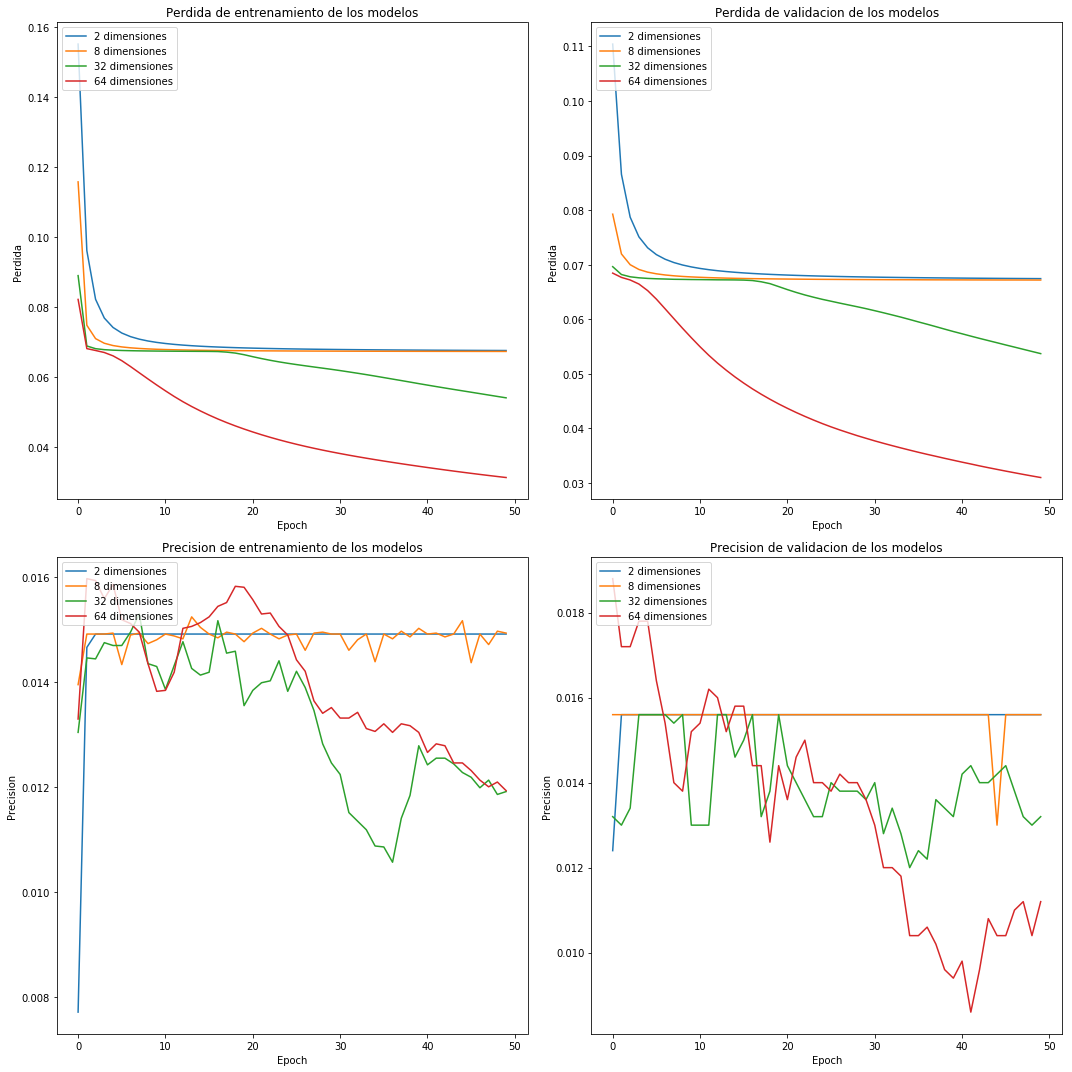

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias[i].history['loss'])
    ax[1].plot(historias[i].history['val_loss'])
    ax[2].plot(historias[i].history['acc'])
    ax[3].plot(historias[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

Se puede observar que para **d=2 y 8** el entrenamiento rápidamente se satura en precisión, mientras que con **d=32 y 64** se logra un mejor comportamiento, donde después de la abrupta caída de la pérdida, lentamente se logra reducir la pérdida tanto en los conjuntos de entrenamiento como en los de validación.

Sin embargo la precisión de estos dos últimos modelos varía enormemente, sin haber aparentes mejoras.

Se vuelven a generar los modelos, esta vez utilizando ReLU como función de activación.

In [28]:
historias=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    end = timer()
    historias.append(history)
    nombre='relu_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    nombre='relu_encoder_768x'+str(dim[i])+'.h5'
    encoder.save(nombre)
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 125.52709939499982 seg
Tiempo de ejecución para d=8: 126.87832488599997 seg
Tiempo de ejecución para d=32: 127.24883787399995 seg
Tiempo de ejecución para d=64: 128.21400577399982 seg


La adición de ReLU al modelo significó un aumento en los tiempos de entrenamiento, presentando una diferencia de tiempos similar al conjunto de modelos anterior.

Luego se grafica el historial de entrenamiento de los modelos.

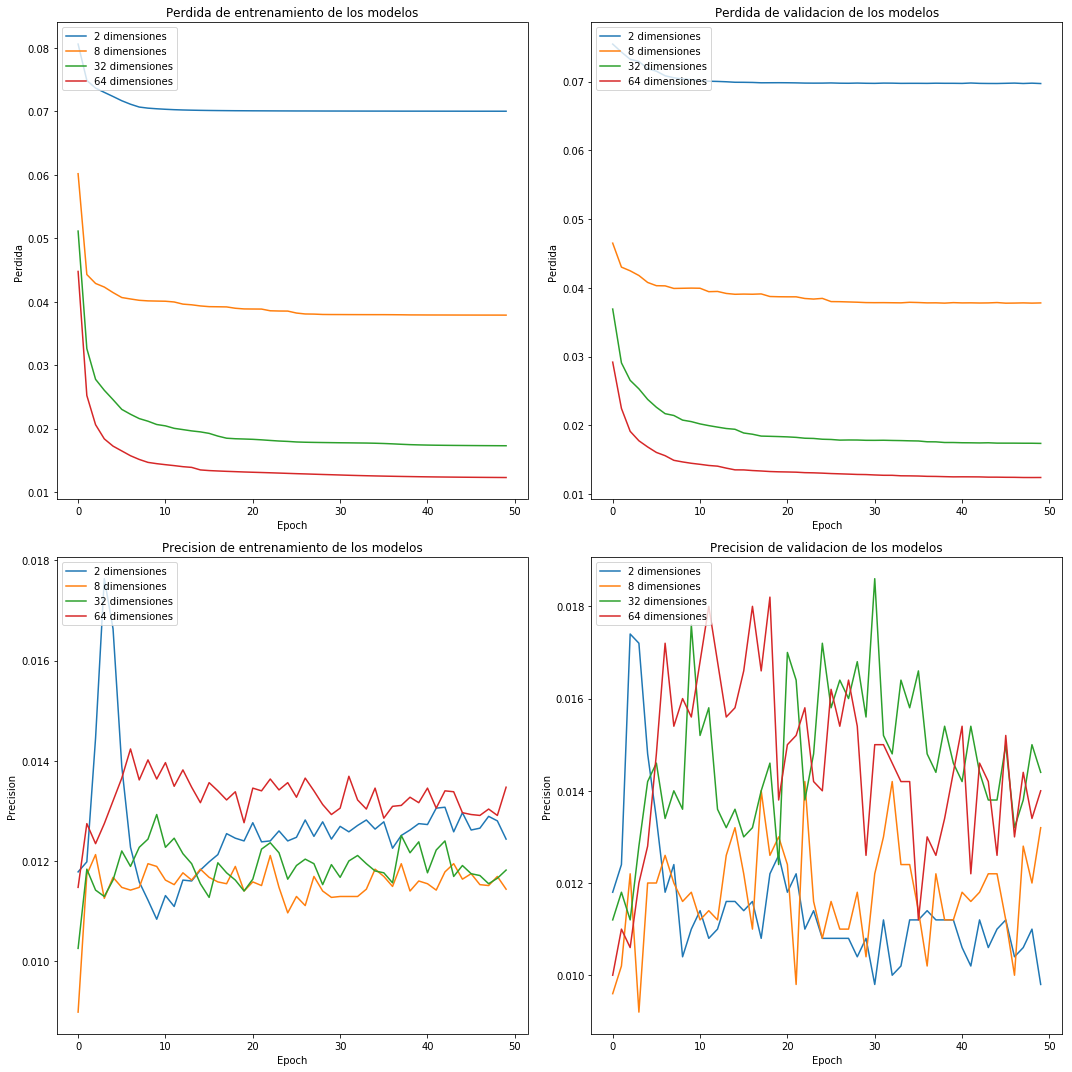

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias[i].history['loss'])
    ax[1].plot(historias[i].history['val_loss'])
    ax[2].plot(historias[i].history['acc'])
    ax[3].plot(historias[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

Esta vez todos los modelos presentan variaciones esperables durante el entrenamiento. Notar que ahora se puede observar que a mayor dimensionalidad en la compresión, mejor se puede reconstruir la imagen, lo cuál es evidenciado por los primeros dos gráficos.

Esto indica que utilizar ReLU como función de activación es completamente viable, al menos según lo que exponen los gráficos de entrenamiento.

Por otro lado, los gráficos de precisión siguen fluctuando en gran medida. Como parece aparente, los gráficos de precisión parecen no dar mucha información sobre el desarrollo del entrenamiento.

Parte b)

In [9]:
from keras.models import load_model
from keras import backend as K

Como se repetirá la presentación de imágenes reconstruidas, se define una función que muestra las primera 10 imágenes del conjunto de validación junto a la imagen reconstruida del modelo.

In [10]:
def mostrarComparacion(d,relu=True):
    if(relu):
        nombre='relu_autoencoder_768x'+str(d)+'.h5'
    else:
        nombre='sigmoid_autoencoder_768x'+str(d)+'.h5'
    autoencoder = load_model(nombre)
    inp = autoencoder.input
    outputs = [layer.output for layer in autoencoder.layers]         
    functor = K.function([inp]+ [K.learning_phase()], outputs ) 
    # Testing
    layer_outs = functor([x_test[0:20], 1.])
    fig=plt.figure(figsize=(12,12))
    rows=5
    columns=4
    j=0
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows,columns,i)
        if(i%2==1):
            plt.title('Imagen original')
            plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
        elif(i%2==0):
            plt.title('Imagen reconstruida')
            plt.imshow(layer_outs[2][j].reshape((28,28)),cmap='gray')
            j+=1
    plt.tight_layout()
    plt.show()

Primero se analiza el de **d=2** utilizando función sigmoidal.

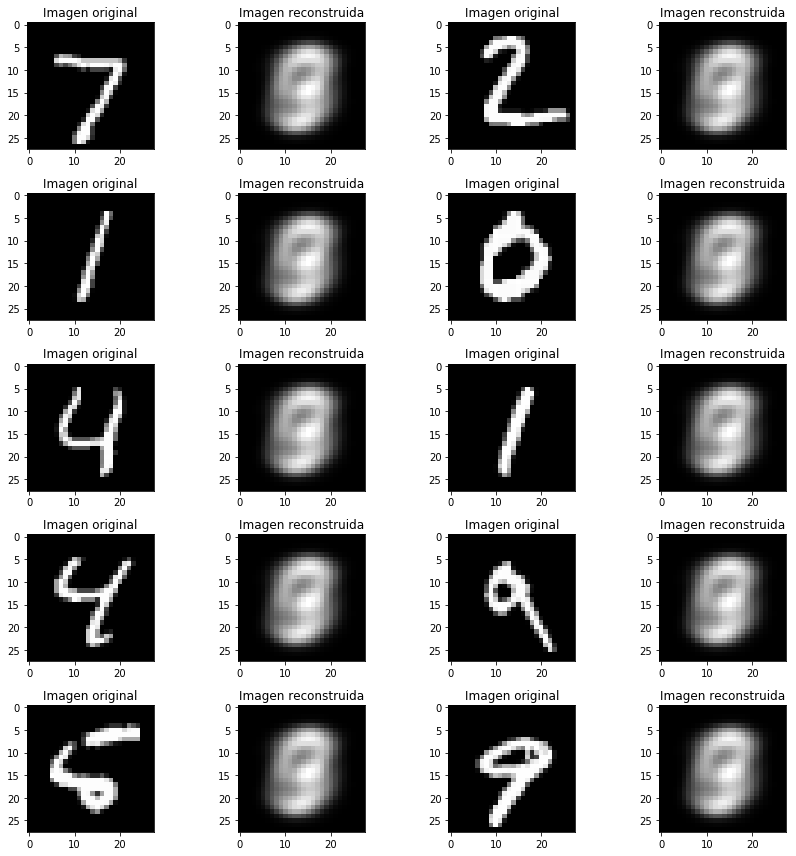

In [14]:
mostrarComparacion(2,False)

El primer modelo sigmoidal no demuestra poder reconocer ninguna imágen, reconstruyendo aparentemente siempre el mismo número.

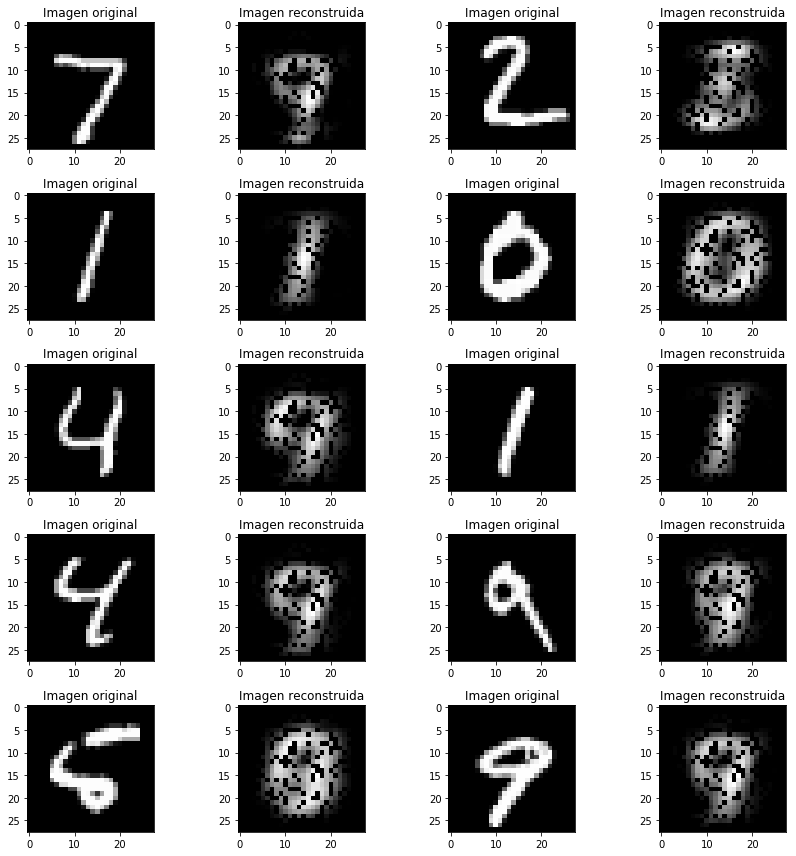

In [15]:
mostrarComparacion(2,True)

Esta vez si se logran apreciar números, con algo de ruido, sin embargo con una dimensionalidad tan pequeña, el modelo sólo puede reconstruir imágenes que tenga una forma aproximada a un conjunto pequeño de números (en este caso es 1, 9 y 0, pero puede variar).

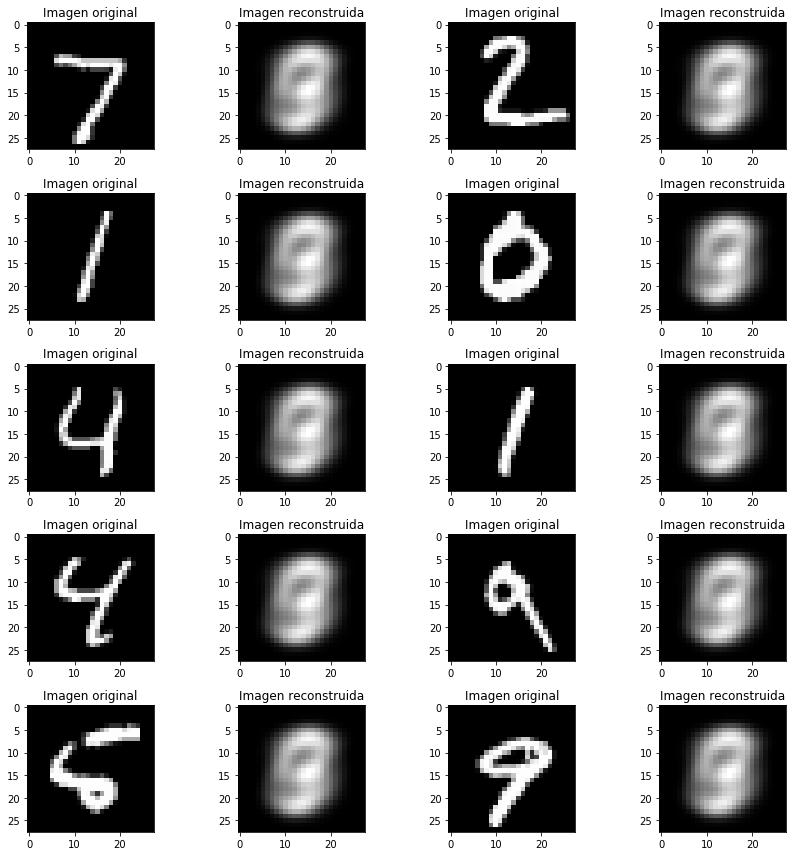

In [16]:
mostrarComparacion(8,False)

Se repite el comportamiento respecto al modelo sigmoidal con d=2. 

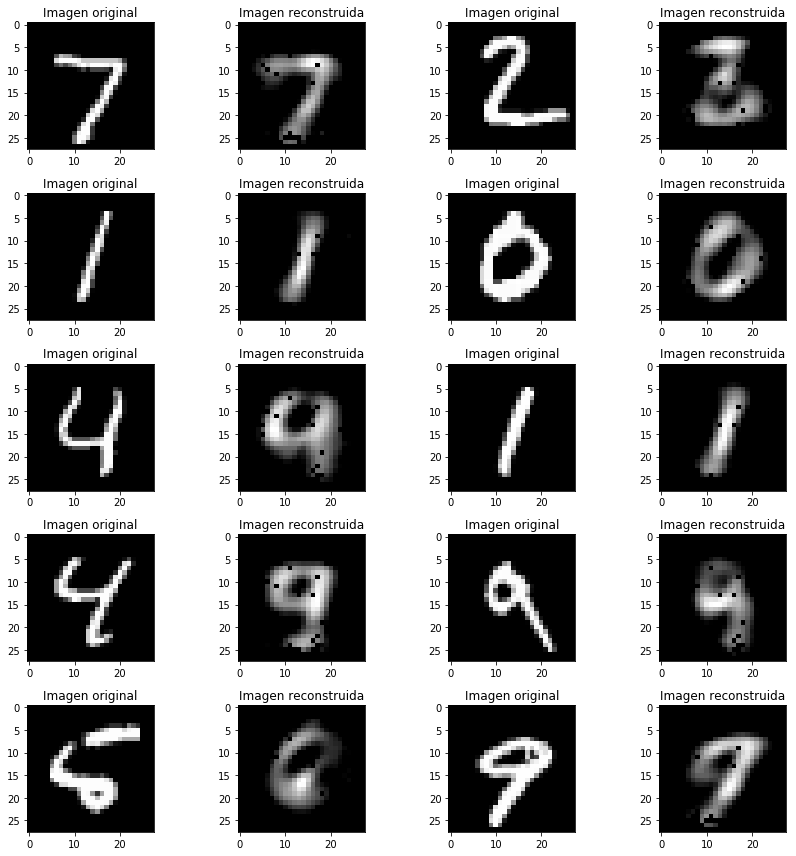

In [17]:
mostrarComparacion(8,True)

Esta vez las imágenes reconstruidas logran mantener a grandes rasgos la forma del número original, a pesar de distar en gran medida. Notar que números como el **4 y el 9** son fáciles de confundir por el modelo.

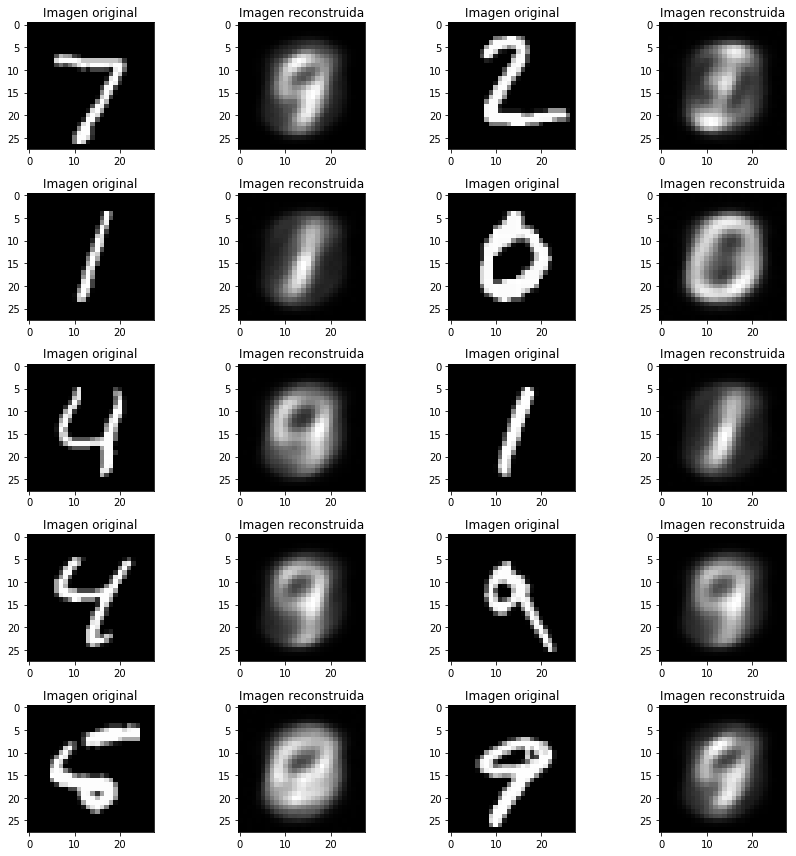

In [18]:
mostrarComparacion(32,False)

Interesantemente, se pueden observar reconstrucciones parciales de los números, sin embargo aún no es distinguible la diferencia entre varios de estos.

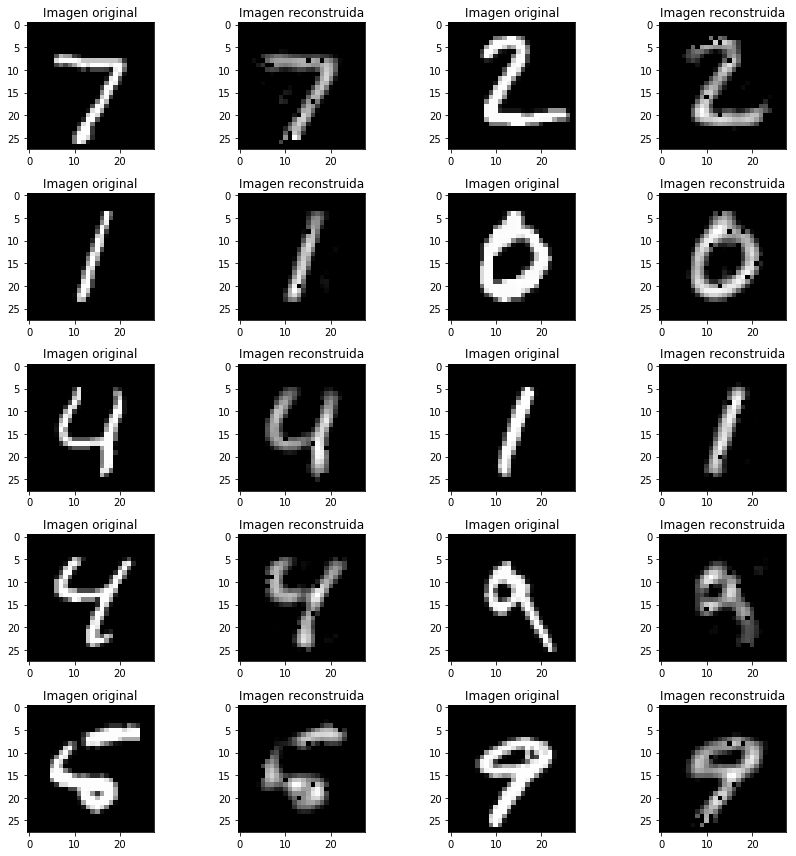

In [19]:
mostrarComparacion(32,True)

Esta vez se logra distinguir mucho mejor la diferencia entre el 4 y el 9, y además la forma de la imagen original puede ser conservada, lo cuál se puede observar en el par de cuatros, que a pesar de corresponder al mismo número, se pueden evidenciar las curvas que los distinguen.

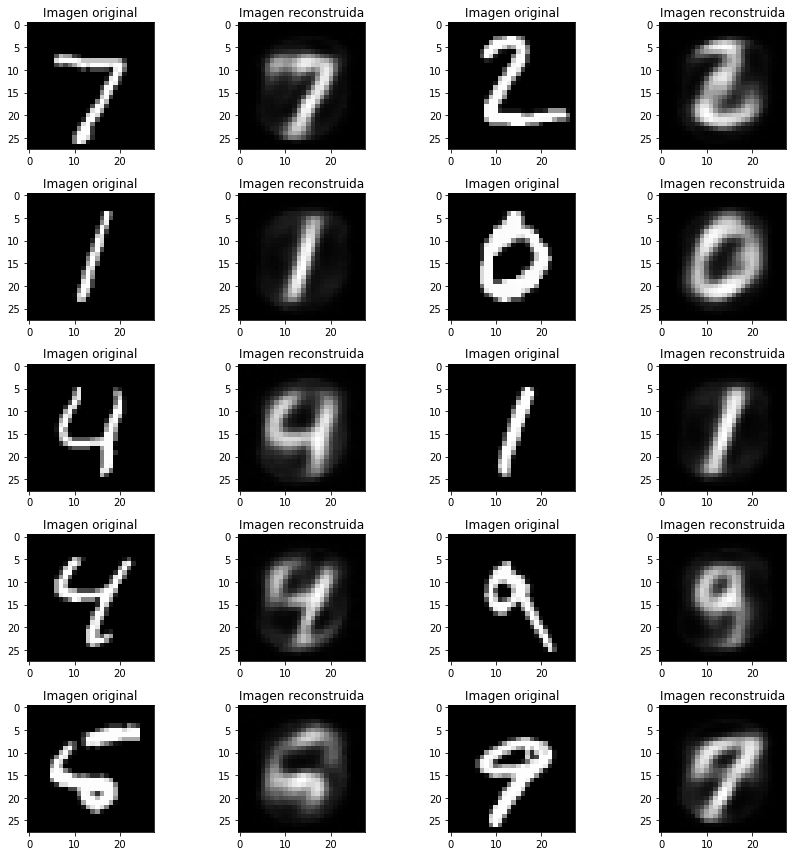

In [20]:
mostrarComparacion(64,False)

En constraste al modelo sigmoidal anterior, ahora se pueden distinguir mucho mejor números como el 6 y el 9, al menos cuando son puestas lado a lado con sus imágenes originales.

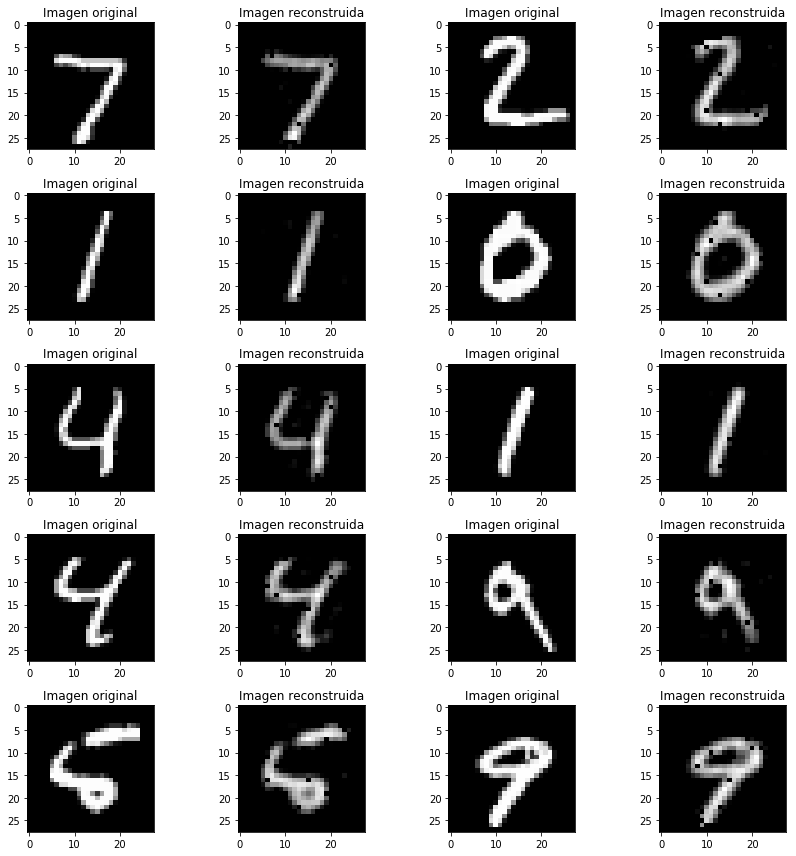

In [21]:
mostrarComparacion(64,True)

Con **d=64** es capaz de reconstruir imágenes con una fidelidad parecida a la de 32 dimensiones. Como se hace visualmente evidente, la reconstrucción hecha con función de activación ReLU es mucho mejor que la sigmoidal. 

Una posible explicación de los puntos negros observados en ReLU y ausentes con sigmoide es que la función ReLU no admite argumentos negativos (se van a 0), por lo que información de reconstrucción puede ser perdida en el proceso.

Luego los errores son calculados para todos los modelos, utilizando MSE.

In [11]:
from keras import losses

In [13]:
d=[2,8,32,64]
funciones=['Sigmoidal','ReLU']
nom=['sigmoid','relu']
for j in range(2):
    pre=nom[j]
    print('Funcion de activacion {}'.format(funciones[j]))
    for i in d:
        nombre=pre+'_autoencoder_768x'+str(i)+'.h5'
        autoencoder = load_model(nombre)
        output=autoencoder.predict(x_test)
        print('d: '+str(i)+' - '+str(round(sum(K.eval(losses.mean_squared_error(x_test,output)))/10000,4)))

Funcion de activacion Sigmoidal
d: 2 - 0.0678
d: 8 - 0.0676
d: 32 - 0.0538
d: 64 - 0.0309
Funcion de activacion ReLU
d: 2 - 0.0702
d: 8 - 0.0376
d: 32 - 0.0171
d: 64 - 0.0122


El error calculado indica lo mismo que fue observado con la comparación visual:

* A mayor dimensionalidad en la compresión, mejor es la reconstrucción en ambos modelos.
* En general, modelos que utilizan ReLU como función de activación reconstruyen mejor la imagen.

Adicionalmente se puede hacer le comparación entre el modelo Sigmoidal con d=64 y ReLU con d=8. Ambos modelos hacen una reconstrucción vaga, pero reconocible de los símbolos que representan, por lo que el error de reconstrucción sí es reflejado en la función de pérdida.

Se procede a hacer una última comparación, esta vez utilizando función ReLU para la primera capa y sigmoidal para la última.

In [22]:
historias_mix=[]
for i in range(len(dim)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim[i], activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias_mix.append(history)
    nombre='mix_autoencoder_768x'+str(dim[i])+'.h5'
    autoencoder.save(nombre)
    end = timer()
    print("Tiempo de ejecución para d={}: {} seg".format(dim[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo de ejecución para d=2: 133.28485833800005 seg
Tiempo de ejecución para d=8: 122.85240868000005 seg
Tiempo de ejecución para d=32: 123.5789839229999 seg
Tiempo de ejecución para d=64: 125.90926992799996 seg


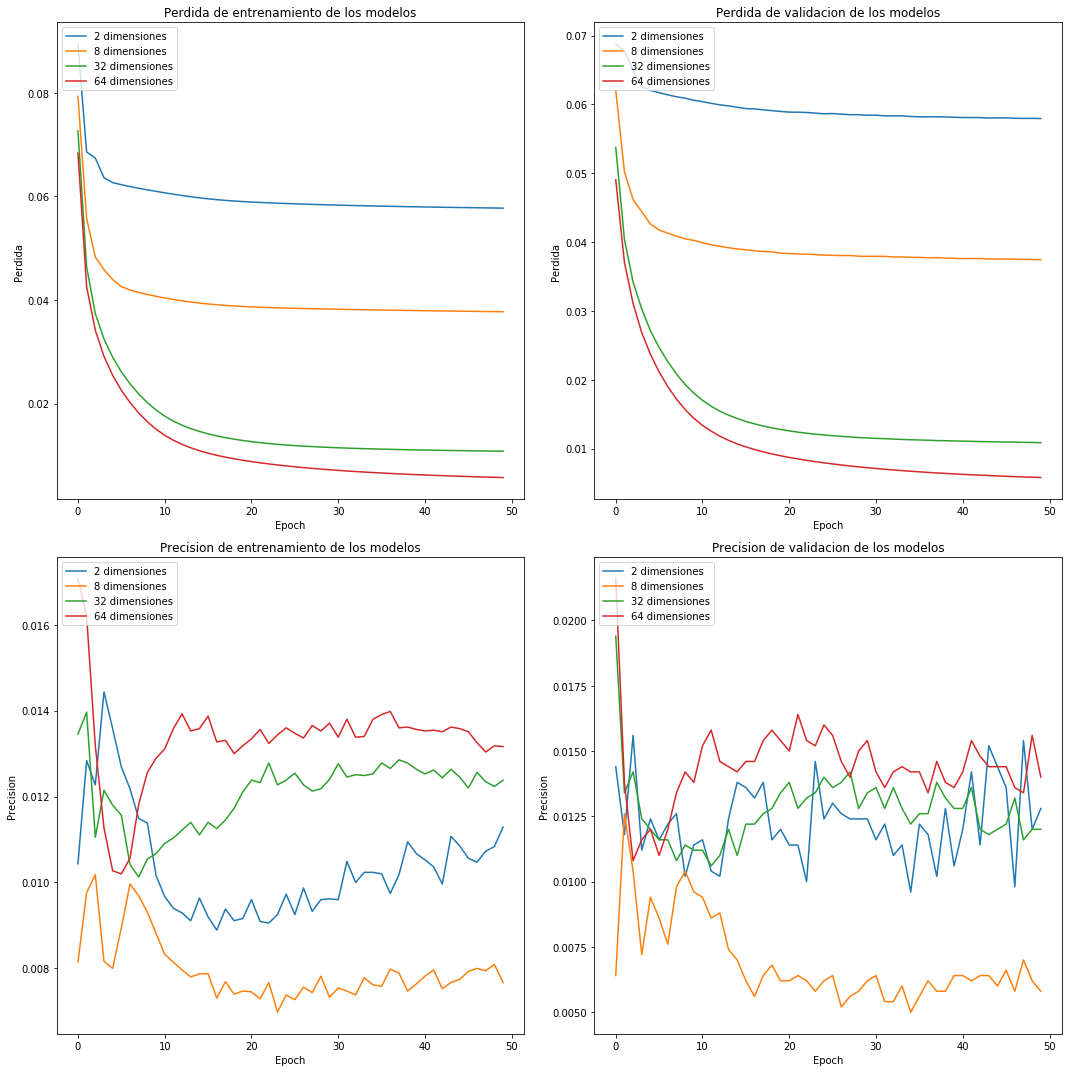

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
ax = axes.flatten()
leg=['2 dimensiones', '8 dimensiones','32 dimensiones','64 dimensiones']
for i in range(len(dim)):
    ax[0].plot(historias_mix[i].history['loss'])
    ax[1].plot(historias_mix[i].history['val_loss'])
    ax[2].plot(historias_mix[i].history['acc'])
    ax[3].plot(historias_mix[i].history['val_acc'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
ax[2].set_title('Precision de entrenamiento de los modelos')
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Epoch')
ax[2].legend(leg, loc='upper left')
ax[3].set_title('Precision de validacion de los modelos')
ax[3].set_ylabel('Precision')
ax[3].set_xlabel('Epoch')
ax[3].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

El comportamiento observado en la tanda de modelos anteriores se repite, con una pérdida menor en aquellos que reducen menos la dimensionalidad de la imagen. Se puede obesrvar además de que la diferencia entre 32 y 64 no es tan pronunciada, lo cuál se pudo apreciar visualmente en la comparación de las reconstrucciones.

Ya que el modelo es capaz de reconstruir imágenes, se puede intuir que los gráficos de precisión no otorgarán mayor información sobre el entrenamiento de los modelos.

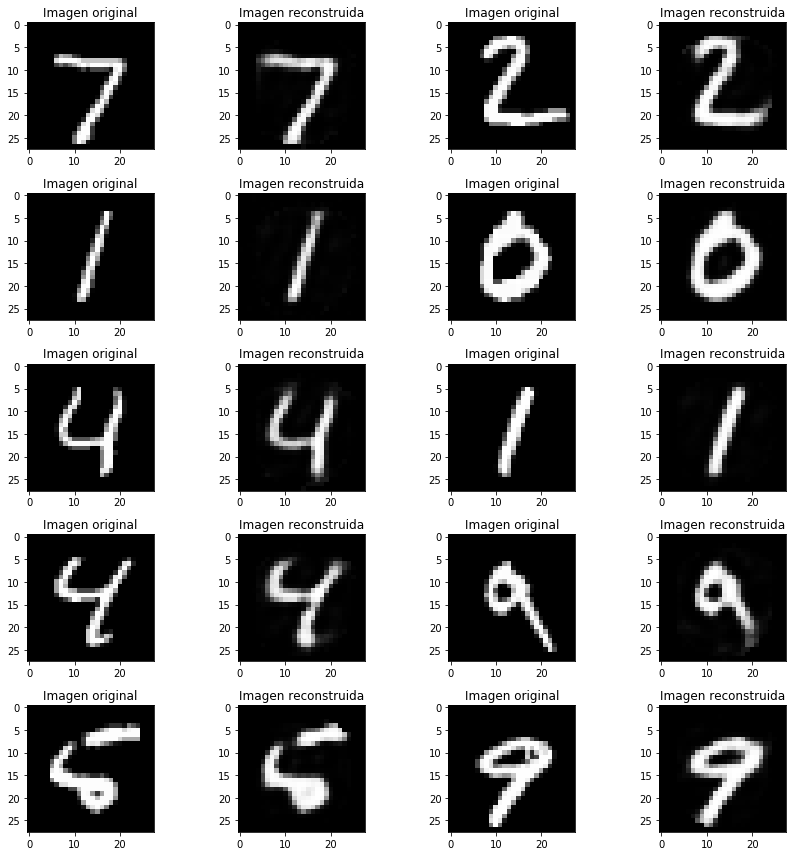

In [24]:
nombre='mix_autoencoder_768x64.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Utilizando función sigmoidal durante la reconstrucción logró deshacerse de los puntos negros, pero provocando simultáneamente que la imagen este ligeramente más borrosa (y a su vez más suave).

Bajo los modelos con ReLU, el error mostrado por los gráficos de entrenamiento parecen ser bien representados en la reconstrucción de las imágenes.

In [14]:
d=[2,8,32,64]
funciones=['Mix','ReLU']
nom=['mix','relu']
for j in range(2):
    pre=nom[j]
    print('Funcion de activacion {}'.format(funciones[j]))
    for i in d:
        nombre=pre+'_autoencoder_768x'+str(i)+'.h5'
        autoencoder = load_model(nombre)
        output=autoencoder.predict(x_test)
        print('d: '+str(i)+' - '+str(round(sum(K.eval(losses.mean_squared_error(x_test,output)))/10000,4)))

Funcion de activacion Mix
d: 2 - 0.0577
d: 8 - 0.0372
d: 32 - 0.0104
d: 64 - 0.0055
Funcion de activacion ReLU
d: 2 - 0.0702
d: 8 - 0.0376
d: 32 - 0.0171
d: 64 - 0.0122


La aseveración anterior, que un mix de funciones de activación mejorala reconstrucción de imágenes, es corrorada por la comparación de los errores de reconstrucción, teniendo en general un mejor desempeño que utilizando solamente ReLU.

Parte c)

PCA es Principal Component Analysis, un método que busca ejes (utilizando vectores y valores propios) donde se contenga la mayor cantidad de información para así poder reducir la dimensión de los datos.

Dado que dos de las dimensiones indicadas por el enunciado son distintas a las de los ítemes anteriores, se crean los modelos con **d'=4** y **d'=16** utilizando la función de activación con mejor desempeño, ReLU.

In [38]:
dim2=[4,16]
historias2=[]
for i in range(len(dim2)):
    start = timer()
    input_img = Input(shape=(784,))
    encoded = Dense(dim2[i], activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim2[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error')
    history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_percent,verbose=0)
    historias2.append(history)
    end = timer()
    nombre='relu_autoencoder_768x'+str(dim2[i])+'.h5'
    autoencoder.save(nombre)
    nombre='relu_encoder_768x'+str(dim2[i])+'.h5'
    encoder.save(nombre)
    print("Tiempo de ejecución para d={}: {} seg".format(dim2[i],end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Tiempo de ejecución para d=4: 122.50845463000041 seg
Tiempo de ejecución para d=16: 121.86009811999975 seg


Las librerías correspondientes son importadas.

In [35]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

Se procede a extraer la reconstrucción de cada modelo

In [11]:
d=[2,4,8,16,32]
for i in range(len(d)):
    pca = PCA(n_components=d[i])
    #PCA
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    #AUTOENCODER
    nombre='relu_encoder_768x'+str(d[i])+'.h5'
    encoder = load_model(nombre)
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    #CLASIFICATION
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    print('d={}'.format(d[i]))
    start = timer()
    print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
    end = timer()
    print("Tiempo de ejecución: {} seg".format(end - start))
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    start = timer()
    print('Classification Accuracy %.2f' % clf.score(encoded_test,y_test))
    end = timer()
    print("Tiempo de ejecución: {} seg".format(end - start))

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución: 0.10201954999865848 seg
Classification Accuracy 0.43
Tiempo de ejecución: 0.03923301499889931 seg
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución: 0.18532289500217303 seg
Classification Accuracy 0.66
Tiempo de ejecución: 0.11111518799953046 seg
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución: 0.7792471819993807 seg
Classification Accuracy 0.89
Tiempo de ejecución: 0.734892418000527 seg
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución: 5.1640899869998975 seg
Classification Accuracy 0.96
Tiempo de ejecución: 6.295561481998448 seg
d=32
Classification Accuracy PCA 0.97
Tiempo de ejecución: 23.304785419997643 seg
Classification Accuracy 0.97
Tiempo de ejecución: 34.46092834499723 seg


Análogo a los resultados de los modelos ReLU, PCA muestra una mayor precisión de clasificación conforme mayor cantidad de componentes son utilizados.

Parte d)

Se define una función para comparar los modelos a entrenar.

In [11]:
def mostrarGraficos(historias):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
    ax = axes.flatten()
    leg=['2 dimensiones', '4 dimensiones','8 dimensiones','16 dimensiones']
    for i in range(4):
        ax[0].plot(historias[i].history['loss'])
        ax[1].plot(historias[i].history['val_loss'])
    ax[0].set_title('Perdida de entrenamiento de los modelos')
    ax[0].set_ylabel('Perdida')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(leg, loc='upper left')
    ax[1].set_title('Perdida de validacion de los modelos')
    ax[1].set_ylabel('Perdida')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(leg, loc='upper left')
    plt.tight_layout()
    plt.show()

In [13]:
def mostrarGraficos2(listaHistorias,nro):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
    ax = axes.flatten()
    leg=['2 capas ocultas','3 capas ocultas','4 capas ocultas']
    for i in range(3):
        ax[0].plot(listaHistorias[i][nro].history['loss'])
        ax[1].plot(listaHistorias[i][nro].history['val_loss'])
    ax[0].set_title('Perdida de entrenamiento de los modelos')
    ax[0].set_ylabel('Perdida')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(leg, loc='upper left')
    ax[1].set_title('Perdida de validacion de los modelos')
    ax[1].set_ylabel('Perdida')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(leg, loc='upper left')
    plt.tight_layout()
    plt.show()

In [24]:
def mostrarTodos(listaHistorias):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
    ax = axes.flatten()
    dim=[2,4,8,16]
    l=[2,3,4]
    leg=[]
    for i in dim:
        for j in l:
            leg.append('d= '+str(i)+' - L= '+str(j))
    for i in range(3):
        for j in range(4):
            ax[0].plot(listaHistorias[i][j].history['loss'])
            ax[1].plot(listaHistorias[i][j].history['val_loss'])
    ax[0].set_title('Perdida de entrenamiento de los modelos')
    ax[0].set_ylabel('Perdida')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(leg, loc='upper left')
    ax[1].set_title('Perdida de validacion de los modelos')
    ax[1].set_ylabel('Perdida')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(leg, loc='upper right')
    plt.tight_layout()
    plt.show()

In [12]:
d=[2,4,8,16]
historias22=[]
historias23=[]
historias24=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error',metrics=['accuracy'])
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_split=val_percent,verbose=0)
        if(i==0):
            historias22.append(history)
        elif(i==1):
            historias23.append(history)
        elif(i==2):
            historias24.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='sigmoid_autoencoder2_768'+sufijo
        autoencoder.save(nombre)
        nombre='sigmoid_encoder2_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))
listaHistorias=[historias22,historias23,historias24]

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 132.56166029299993 seg
Tiempo de ejecución para d=4 y L=2: 124.67363956200006 seg
Tiempo de ejecución para d=8 y L=2: 121.68484206500011 seg
Tiempo de ejecución para d=16 y L=2: 125.22142289999988 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 168.21779921100006 seg
Tiempo de ejecución para d=4 y L=3: 160.8752452880001 seg
Tiempo de ejecución para d=8 y L=3: 160.83775074200003 seg
Tiempo de ejecución para d=16 y L=3: 159.32819854499985 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 273.12206165399994 seg
Tiempo de ejecución para d=4 y L=4: 274.9556224009998 seg
Tiempo de ejecución para d=8 y L=4: 356.16770416500003 seg
Tiempo de ejecución para d=16 y L=4: 488.72844313199994 seg


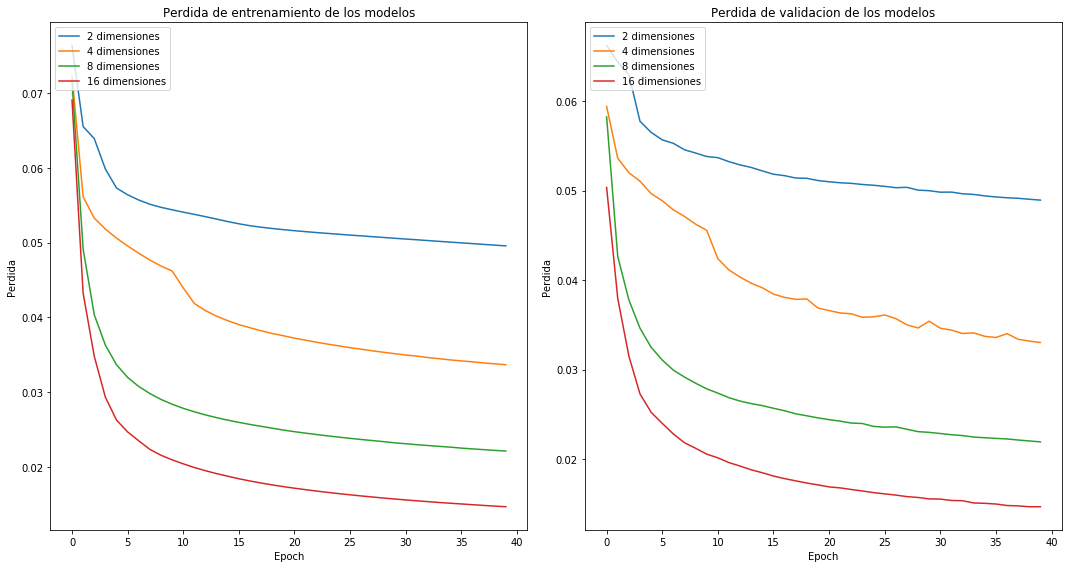

In [17]:
mostrarGraficos(historias22)

Comportamiento anterior en modelos con reducción a 4 y 8 dimensiones indica la existencia de _NaN_ como resultado de cálculos de pérdida y precisión, lo cuál puede atribuirse a un problema de gradiente explosiva.

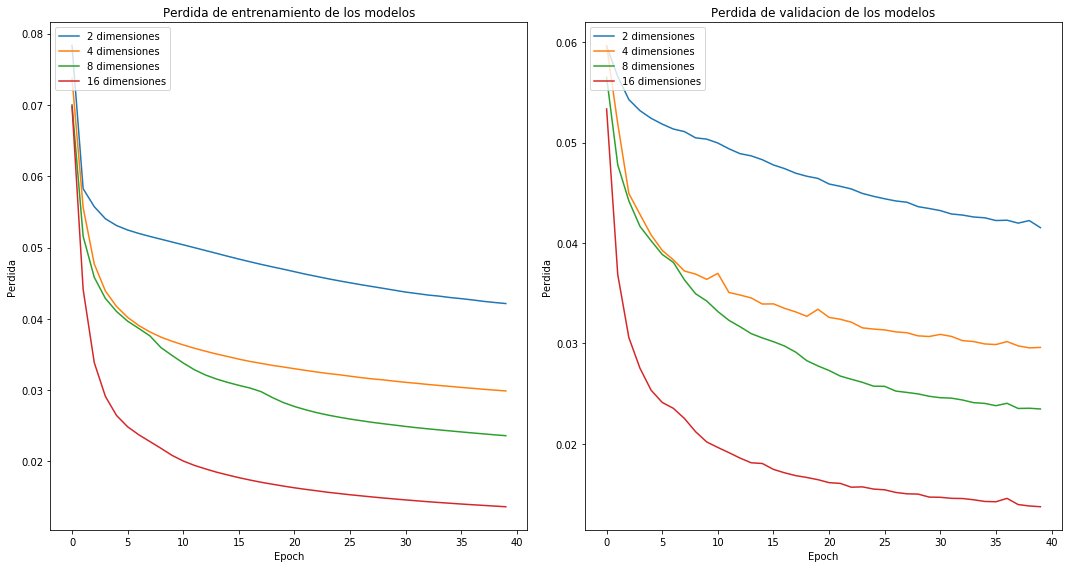

In [18]:
mostrarGraficos(historias23)

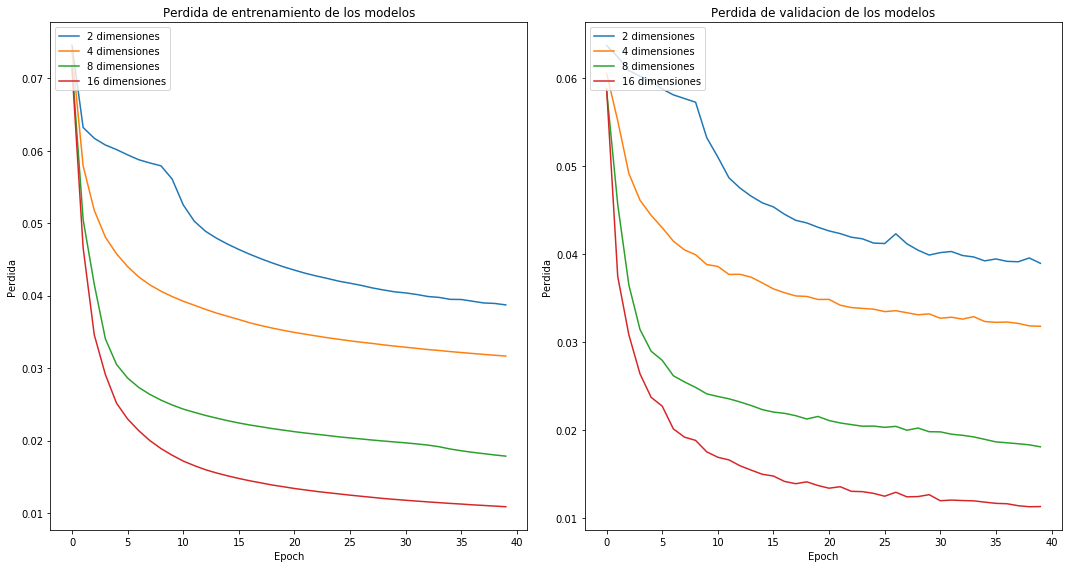

In [19]:
mostrarGraficos(historias24)

Agregar más capas (con un total de 4 capas escondidas) presenta resultados más fáciles de interpretar como aprendizaje. Se puede observar de que el tamaño de la dimensión a la que se reduce la imagen tiene menor impacto, hasta el punto de ser casi imperceptible, lo que puede ser indicador de que la complejidad de las capas ocultas compensa cualquier pérdida de información durante la compresión de la imagen.

Sin embargo, la precisión de la reconstrucción varía enormemente, independiente de la dimensión.

Luego se procede a comparar respecto a la cantidad de capas, manteniendo fijo la cantidad de componentes utilizados.

d=2


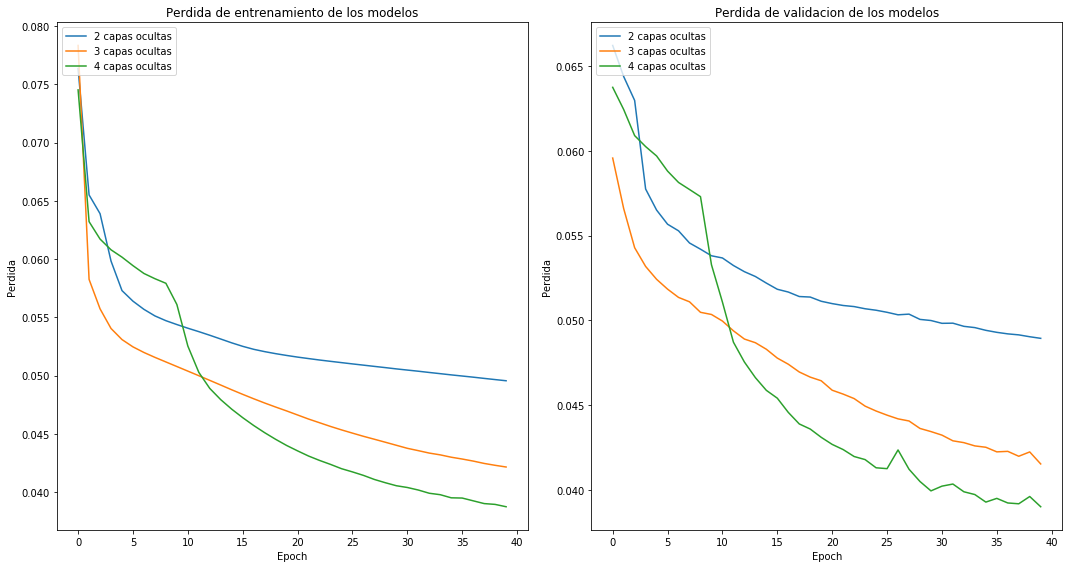

d=4


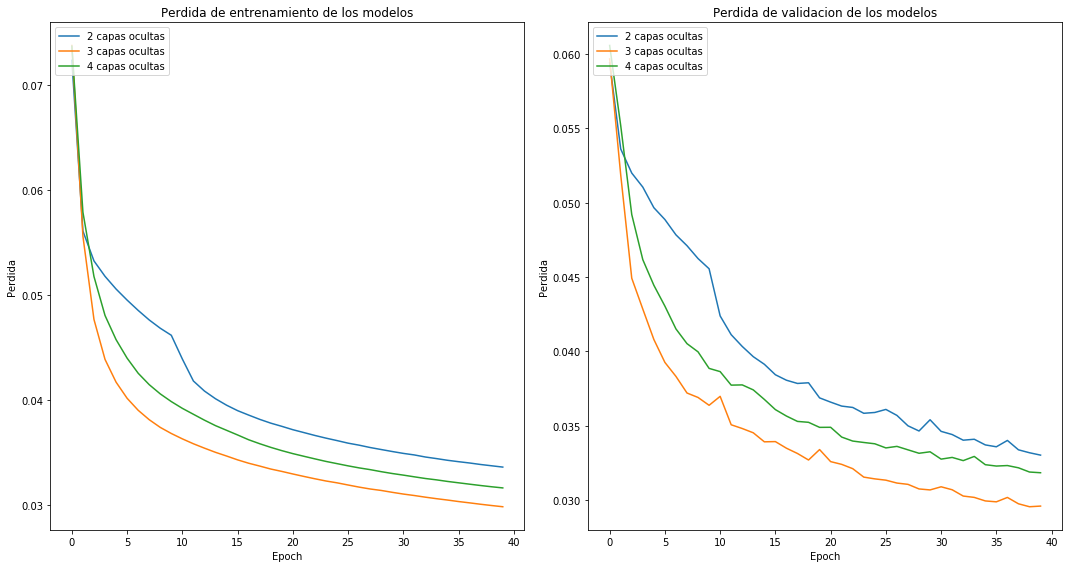

d=8


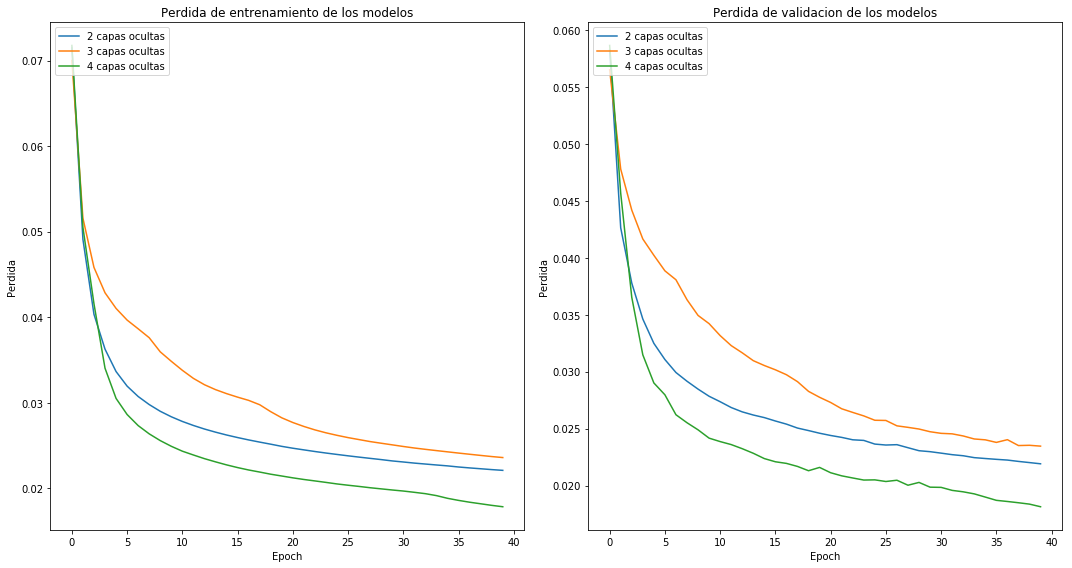

d=16


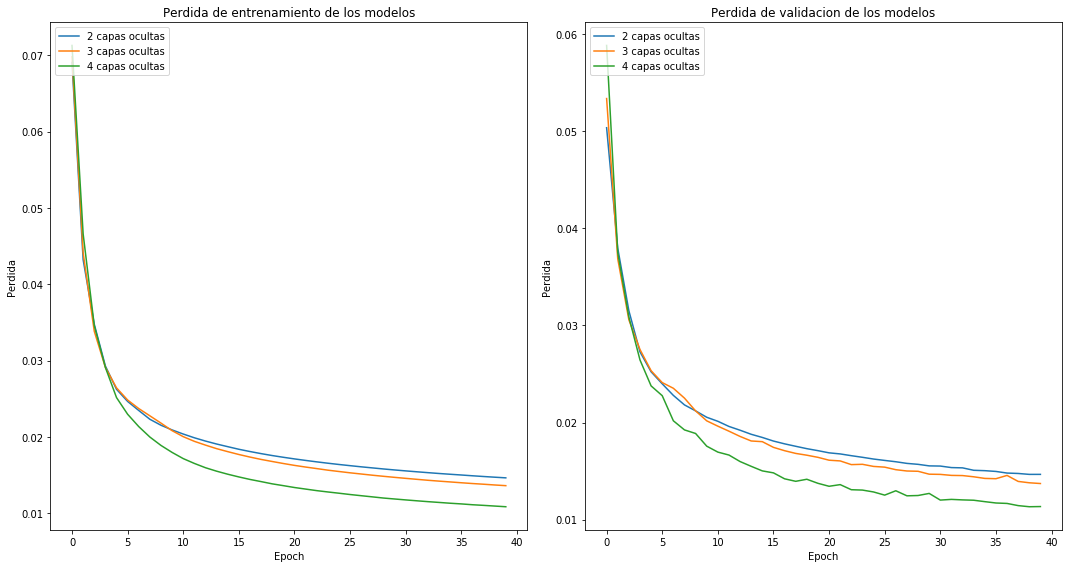

In [44]:
for i in range(4):
    print('d='+str(2**(i+1)))
    mostrarGraficos2(listaHistorias,i)

En todos los casos el mejor aprendizaje es logrado utilizando más capas ocultas, siendo aparente que mientras más se utilicen mejor es el desempeño.

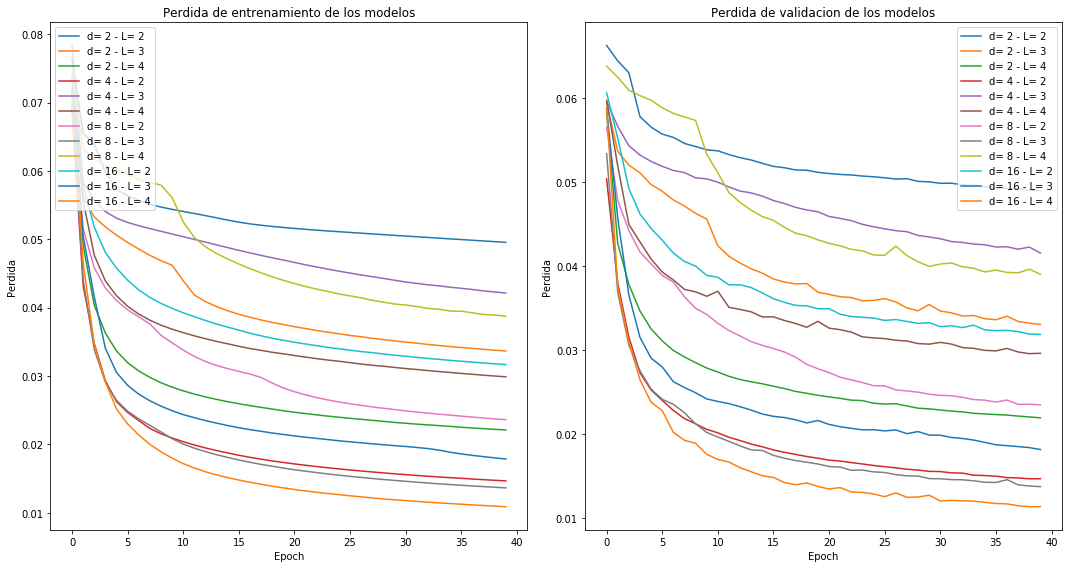

In [25]:
mostrarTodos(listaHistorias)

Comparando el aprendizaje de todos los modelos, se puede apreciar que el de mejor desempeño es aquel que utiliza 4 capas y 16 componentes.

Finalmente se hace la comparación con PCA, definiendo la función correspondiente.

In [15]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [16]:
def kNeighbors(prefijo):
    d=[2,4,8,16]
    profundidad=[2,3,4]
    for i in range(len(d)):
        tiempos=[]
        flag=True
        for j in range(len(profundidad)):
            if(flag):
                pca = PCA(n_components=d[i])
                #PCA
                pca.fit(x_train)
                pca_train = pca.transform(x_train)
                pca_test = pca.transform(x_test)
            #AUTOENCODER
            sufijo='x250x'+str(d[i])+'.h5'
            if(j>0):
                sufijo='x500'+sufijo
                if(j>1):
                    sufijo='x1000'+sufijo
            nombre=prefijo+'_768'+sufijo
            encoder = load_model(nombre)
            # Testing
            encoded_train = encoder.predict(x_train)
            encoded_test = encoder.predict(x_test)
            #CLASIFICATION
            if(flag):
                print('d={}'.format(d[i]))

                clf = KNeighborsClassifier(10)
                start = timer()
                clf.fit(pca_train, y_train)
                print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
                end = timer()
                print("Tiempo de ejecución PCA: {0:.2f} seg".format(end - start))
                flag=False
            clf = KNeighborsClassifier(10)
            start = timer()
            clf.fit(encoded_train, y_train)
            print('Classification Accuracy {0:.2f}, L={1}'.format(clf.score(encoded_test,y_test),profundidad[j]))
            end = timer()
            tiempos.append(end-start)
        print("Tiempo de ejecución promedio: {0:.2f} seg".format(np.mean(tiempos)))
        print("------------------------------------")

In [51]:
kNeighbors('sigmoid_encoder2')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.12 seg
Classification Accuracy 0.61, L=2
Classification Accuracy 0.68, L=3
Classification Accuracy 0.75, L=4
Tiempo de ejecución promedio: 0.07 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.14 seg
Classification Accuracy 0.81, L=2
Classification Accuracy 0.85, L=3
Classification Accuracy 0.82, L=4
Tiempo de ejecución promedio: 0.12 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.75 seg
Classification Accuracy 0.92, L=2
Classification Accuracy 0.92, L=3
Classification Accuracy 0.94, L=4
Tiempo de ejecución promedio: 0.55 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 5.28 seg
Classification Accuracy 0.95, L=2
Classification Accuracy 0.96, L=3
Classification Accuracy 0.96, L=4
Tiempo de ejecución promedio: 4.26 seg
------------------------------------


Salvo cuando se utilizan 2 y 4 componentes, PCA y el autoencoder tienen una precisión de clasificación relativamente parecida, mejorando mientras más capas se utilicen.

Cabe destacar que el tiempo aumenta notablemente con 16 componentes, lo cuál se puede deber a la complejidad de los modelos por la cantidad de parámetros que introducen estos.

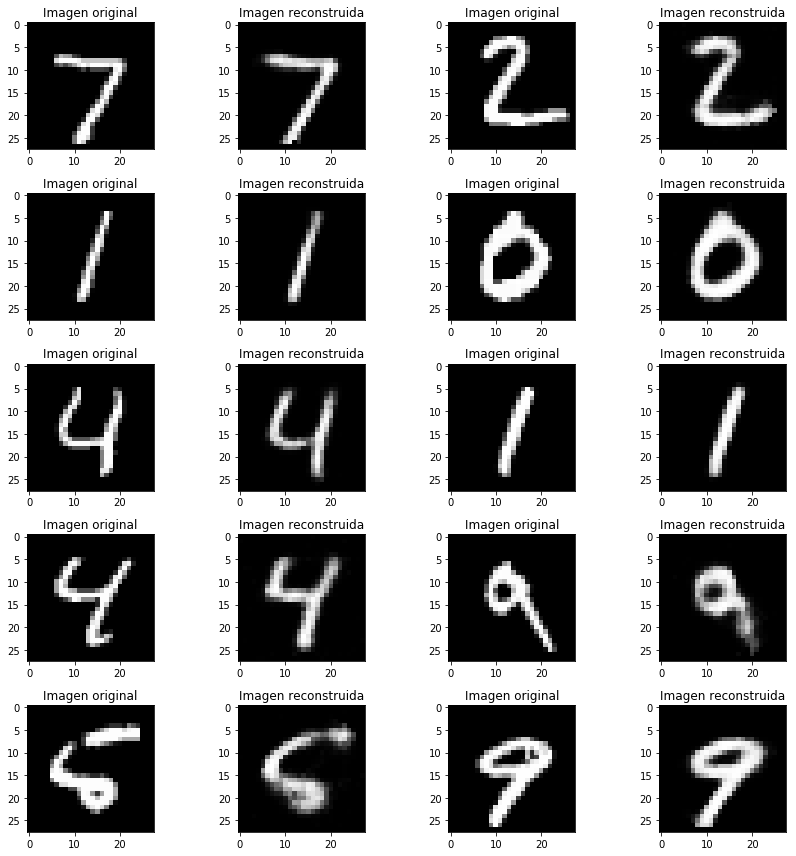

In [53]:
nombre='sigmoid_autoencoder2_768x1000x500x250x16.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Este proceso es repetido para dos variaciones adicionales, uno utilizando Adam como optimizador y además cambiando la función de pérdida de Mean Squared Error a Binary Cross-entropy.

In [31]:
d=[2,4,8,16]
historias42=[]
historias43=[]
historias44=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
        if(i==0):
            historias42.append(history)
        elif(i==1):
            historias43.append(history)
        elif(i==2):
            historias44.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='my_autoencoder4_768'+sufijo
        autoencoder.save(nombre)
        nombre='my_encoder4_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))
listaHistorias4=[historias42,historias43,historias44]

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 49.99390012299955 seg
Tiempo de ejecución para d=4 y L=2: 49.30030734100001 seg
Tiempo de ejecución para d=8 y L=2: 49.69328910999866 seg
Tiempo de ejecución para d=16 y L=2: 50.06162821399994 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 76.00609979999899 seg
Tiempo de ejecución para d=4 y L=3: 80.66084947499985 seg
Tiempo de ejecución para d=8 y L=3: 77.45843725099985 seg
Tiempo de ejecución para d=16 y L=3: 81.41827351699976 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 149.12261724000018 seg
Tiempo de ejecución para d=4 y L=4: 150.238182228999 seg
Tiempo de ejecución para d=8 y L=4: 151.00984172000062 seg
Tiempo de ejecución para d=16 y L=4: 152.26925500799916 seg


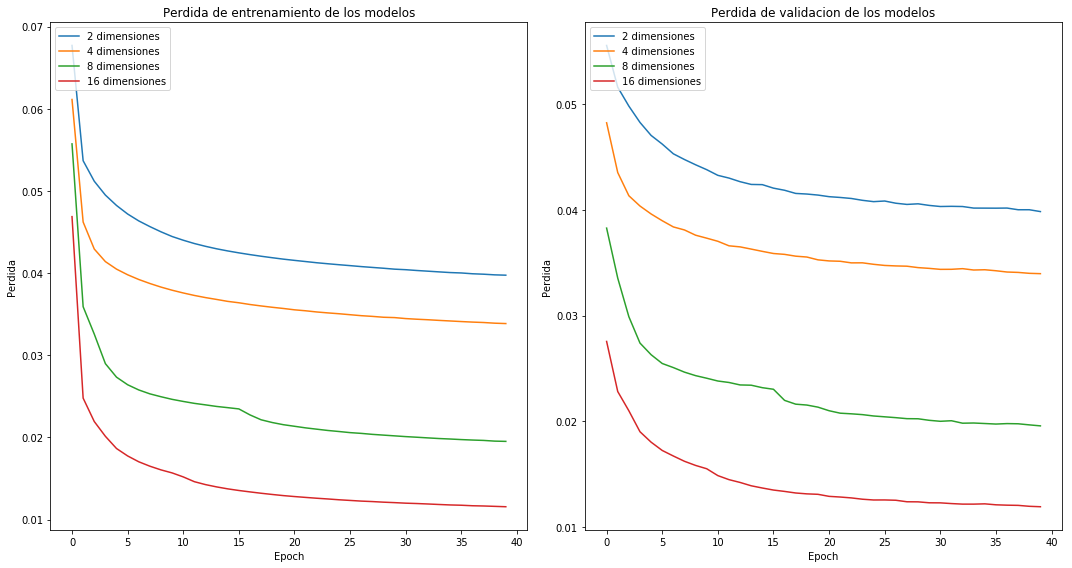

In [32]:
mostrarGraficos(historias42)

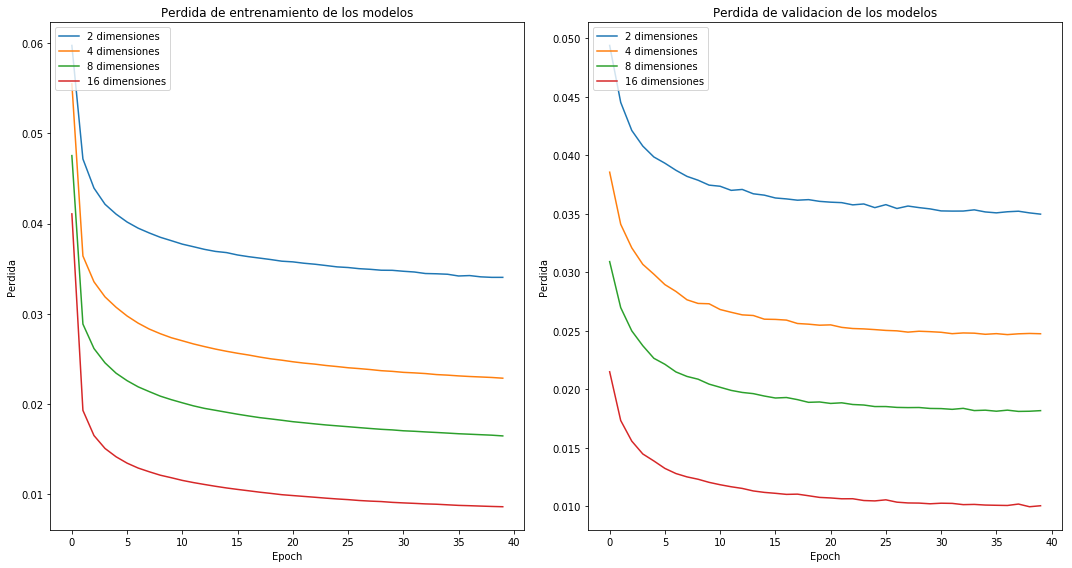

In [33]:
mostrarGraficos(historias43)

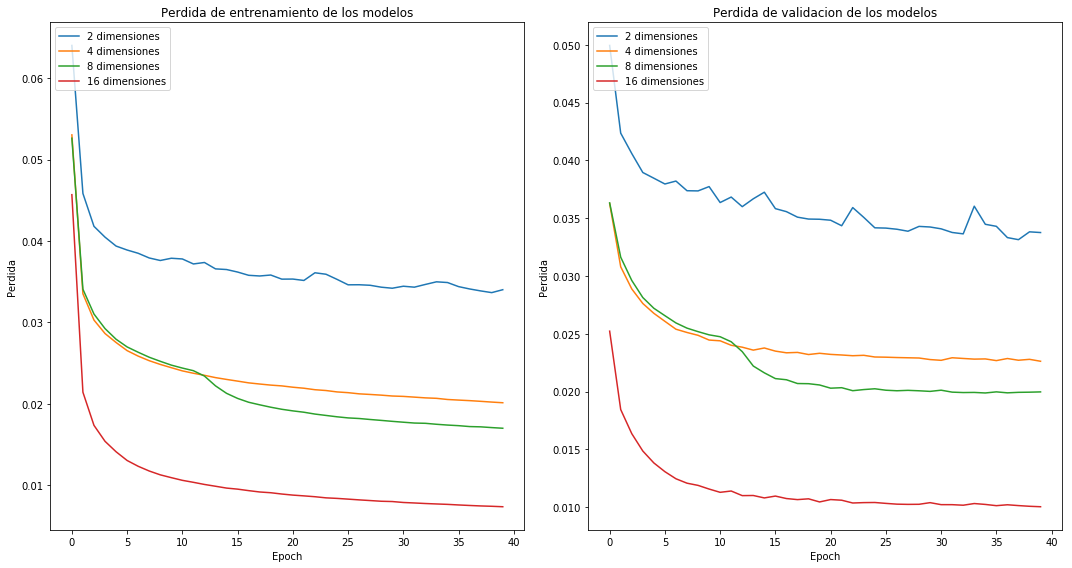

In [34]:
mostrarGraficos(historias44)

d=2


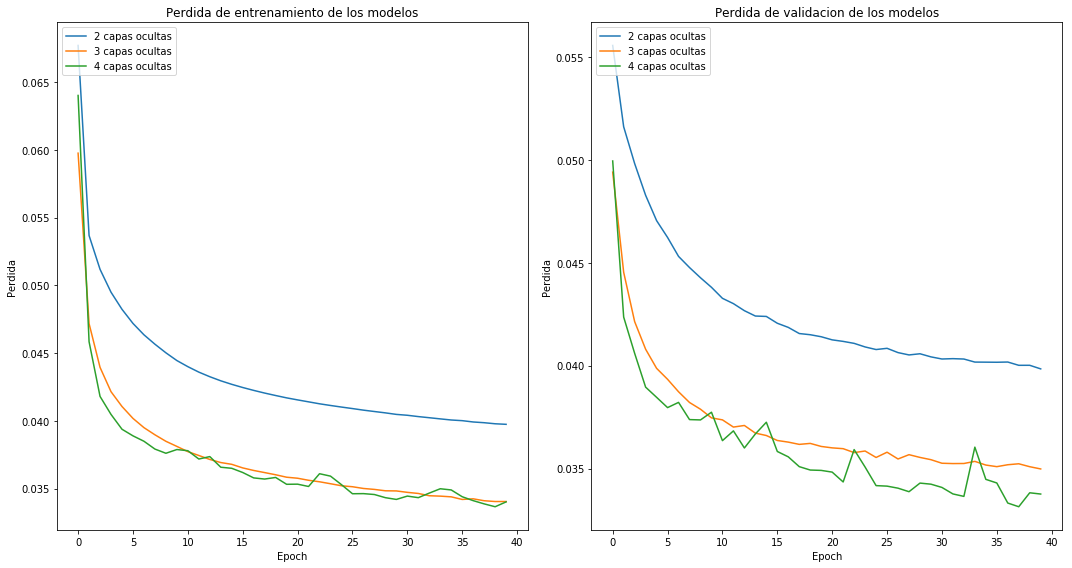

d=4


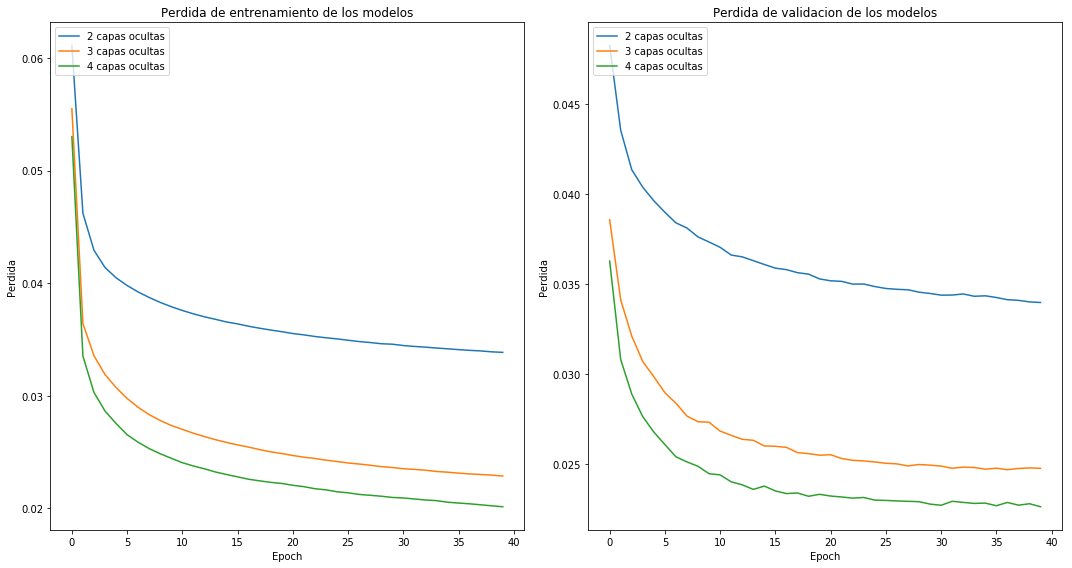

d=8


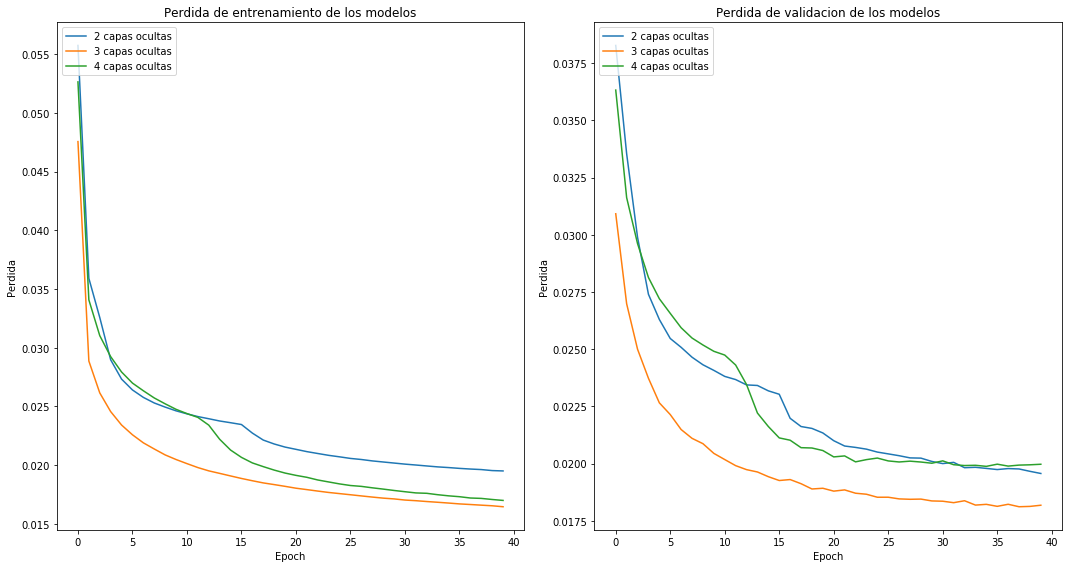

d=16


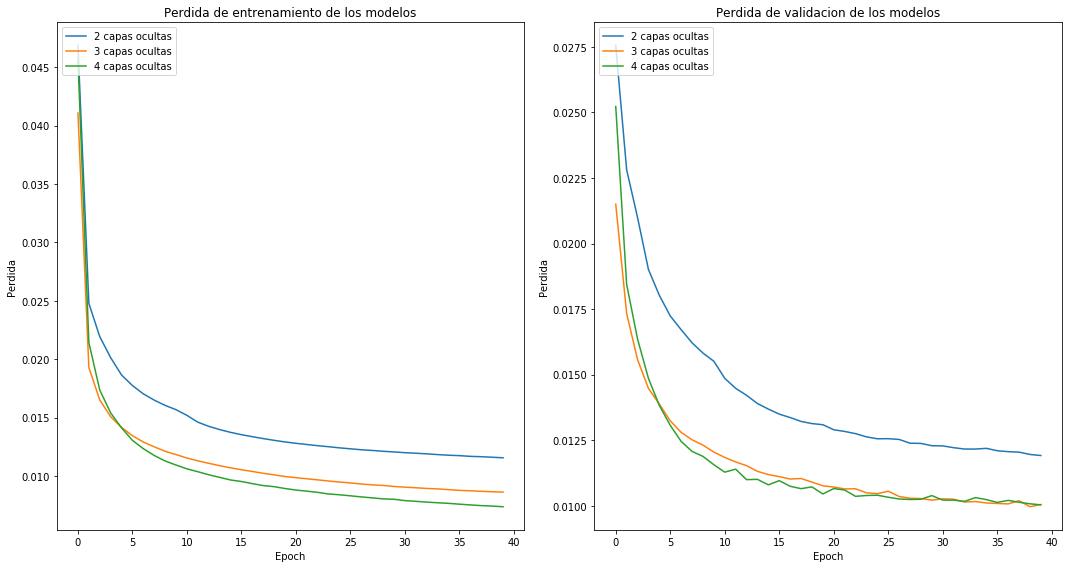

In [45]:
for i in range(4):
    print('d='+str(2**(i+1)))
    mostrarGraficos2(listaHistorias4,i)

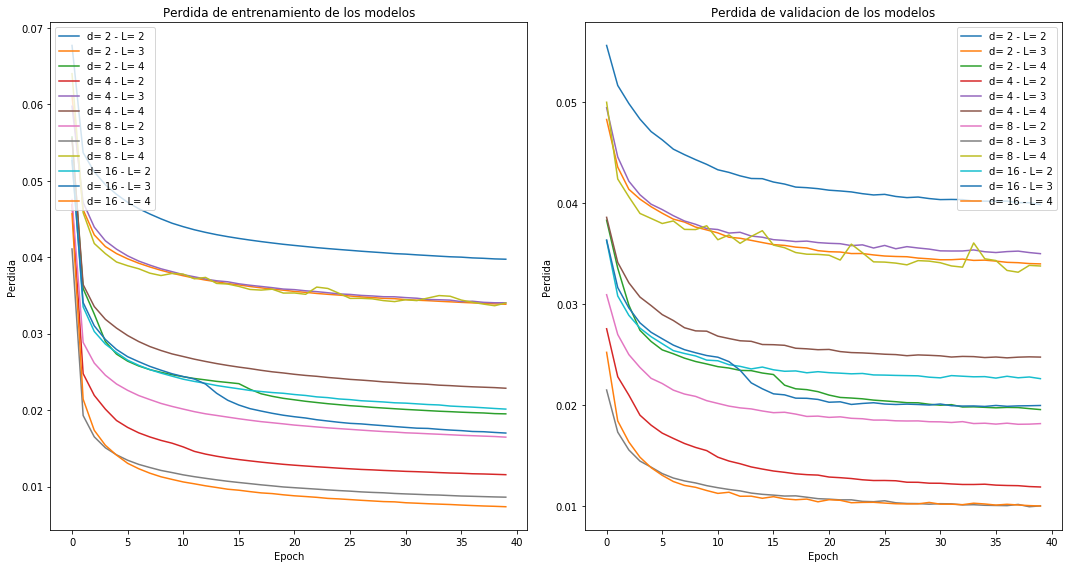

In [35]:
mostrarTodos(listaHistorias4)

In [52]:
kNeighbors('my_encoder4')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.07 seg
Classification Accuracy 0.70, L=2
Classification Accuracy 0.81, L=3
Classification Accuracy 0.86, L=4
Tiempo de ejecución promedio: 0.06 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.14 seg
Classification Accuracy 0.77, L=2
Classification Accuracy 0.92, L=3
Classification Accuracy 0.95, L=4
Tiempo de ejecución promedio: 0.12 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.90 seg
Classification Accuracy 0.93, L=2
Classification Accuracy 0.95, L=3
Classification Accuracy 0.94, L=4
Tiempo de ejecución promedio: 0.42 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 5.54 seg
Classification Accuracy 0.96, L=2
Classification Accuracy 0.97, L=3
Classification Accuracy 0.97, L=4
Tiempo de ejecución promedio: 3.72 seg
------------------------------------


Igual que en el caso anterior, 16 componentes y 4 capas significa un mejor aprendizaje, pero además la precisión de clasificación mejora notablemente, con 4 componentes y 4 capas la precisión del modelo con optimizador Adam se puede comparar al de 16 componentes con 4 capas.

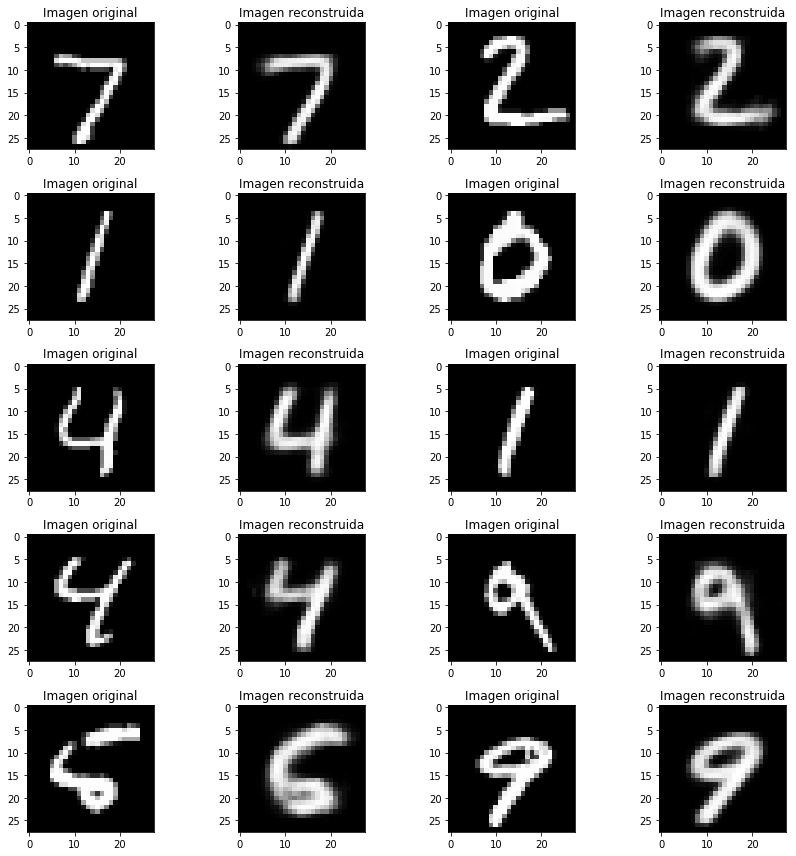

In [64]:
nombre='my_autoencoder4_768x1000x500x250x4.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])

fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

In [54]:
d=[2,4,8,16]
historias52=[]
historias53=[]
historias54=[]
for i in range(3):
    for j in d:
        target_dim = j #try other and do a nice plot
        input_img = Input(shape=(784,))
        if(i==0):
            encoded1 = Dense(250, activation='relu')(input_img)
            encoded4 = Dense(target_dim, activation='relu')(encoded1)
            decoded2 = Dense(250, activation='relu')(encoded4)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==1):
            encoded1 = Dense(500, activation='relu')(input_img)
            encoded2 = Dense(250, activation='relu')(encoded1)
            encoded4 = Dense(target_dim, activation='relu')(encoded2)
            decoded3 = Dense(250, activation='relu')(encoded4)
            decoded2 = Dense(500, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        elif(i==2):
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(target_dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            encoder = Model(input=input_img, output=encoded4)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)
        autoencoder = Model(input=input_img, output=decoded1)
        autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
        start = timer()
        history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
        if(i==0):
            historias52.append(history)
        elif(i==1):
            historias53.append(history)
        elif(i==2):
            historias54.append(history)
        end = timer()
        sufijo='x250x'+str(j)+'.h5'
        if(i>0):
            sufijo='x500'+sufijo
            if(i>1):
                sufijo='x1000'+sufijo
        nombre='my_autoencoder5_768'+sufijo
        autoencoder.save(nombre)
        nombre='my_encoder5_768'+sufijo
        encoder.save(nombre)
        prof=i+2
        print("Tiempo de ejecución para d={} y L={}: {} seg".format(j,prof,end - start))
listaHistorias5=[historias52,historias53,historias54]

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=2: 65.85993397499988 seg
Tiempo de ejecución para d=4 y L=2: 63.548091847998876 seg
Tiempo de ejecución para d=8 y L=2: 65.91609892700035 seg
Tiempo de ejecución para d=16 y L=2: 66.07510940700013 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=3: 91.58943542599991 seg
Tiempo de ejecución para d=4 y L=3: 94.53849067299961 seg
Tiempo de ejecución para d=8 y L=3: 94.77455644600013 seg
Tiempo de ejecución para d=16 y L=3: 92.80985873300051 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para d=2 y L=4: 165.79786115299976 seg
Tiempo de ejecución para d=4 y L=4: 165.4625931669998 seg
Tiempo de ejecución para d=8 y L=4: 165.96212315499906 seg
Tiempo de ejecución para d=16 y L=4: 167.42363774899968 seg


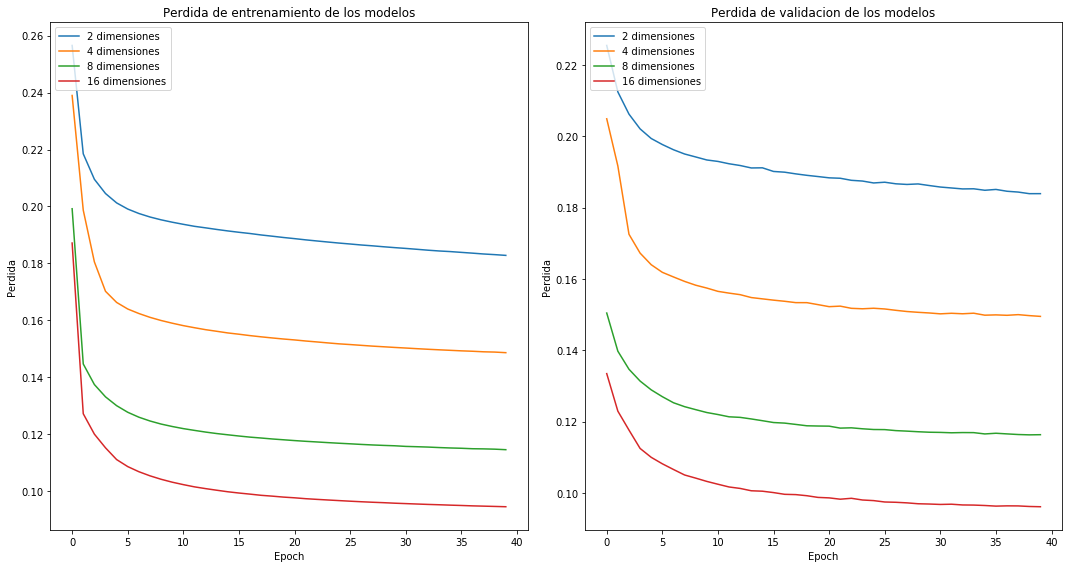

In [55]:
mostrarGraficos(historias52)

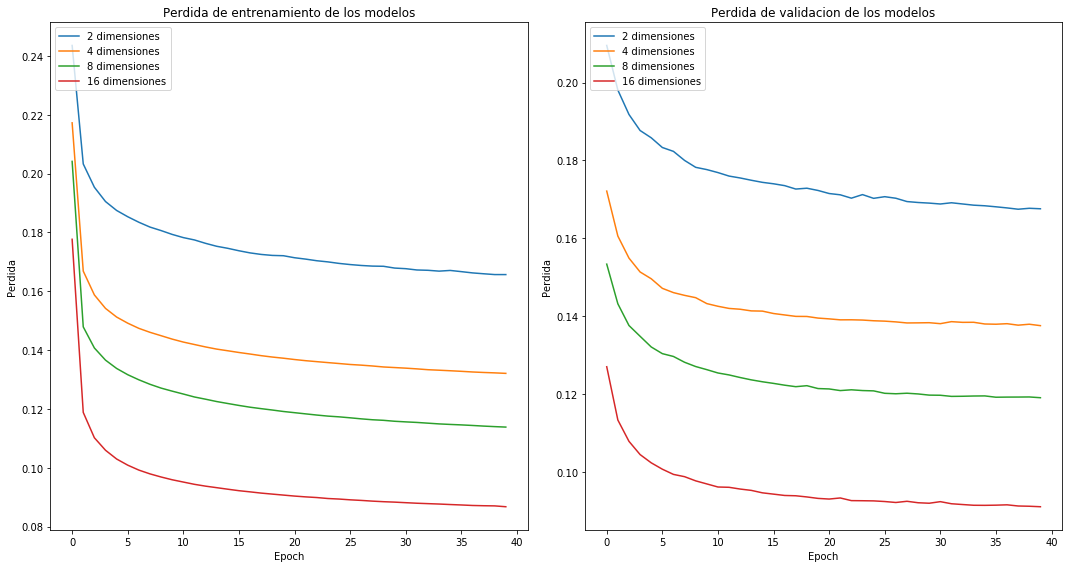

In [56]:
mostrarGraficos(historias53)

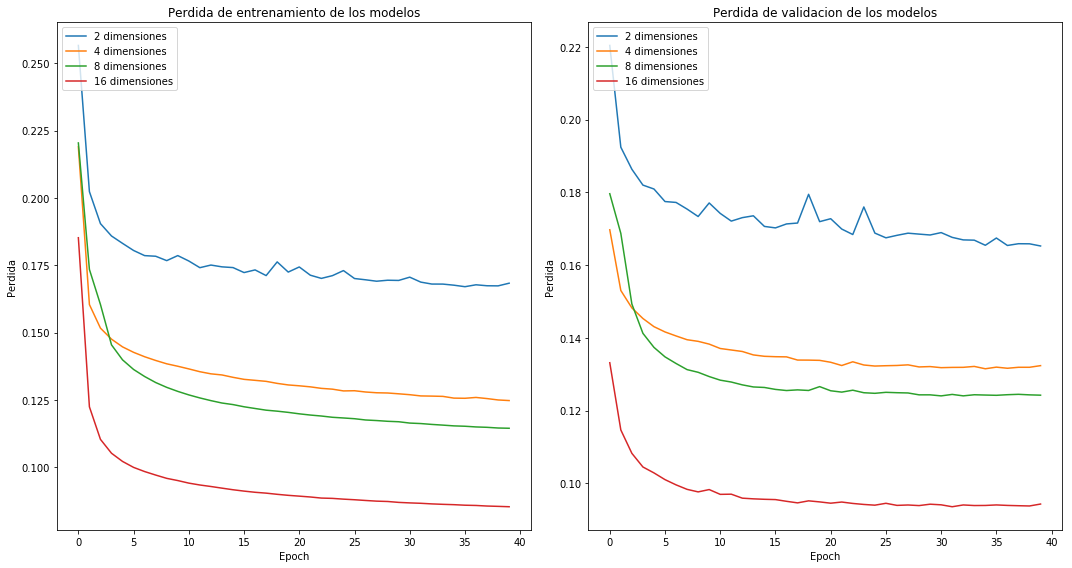

In [57]:
mostrarGraficos(historias54)

d=2


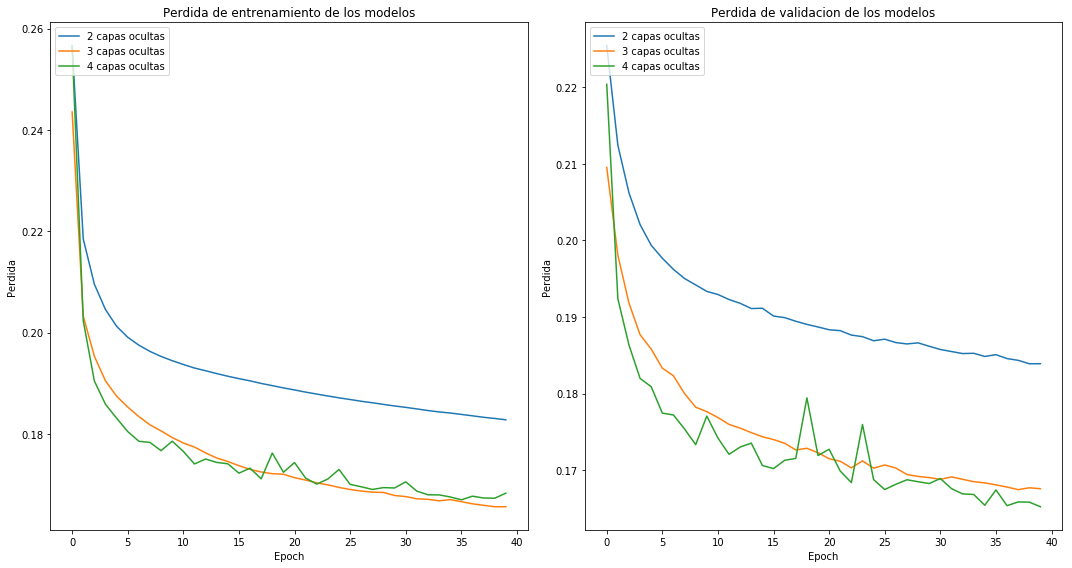

d=4


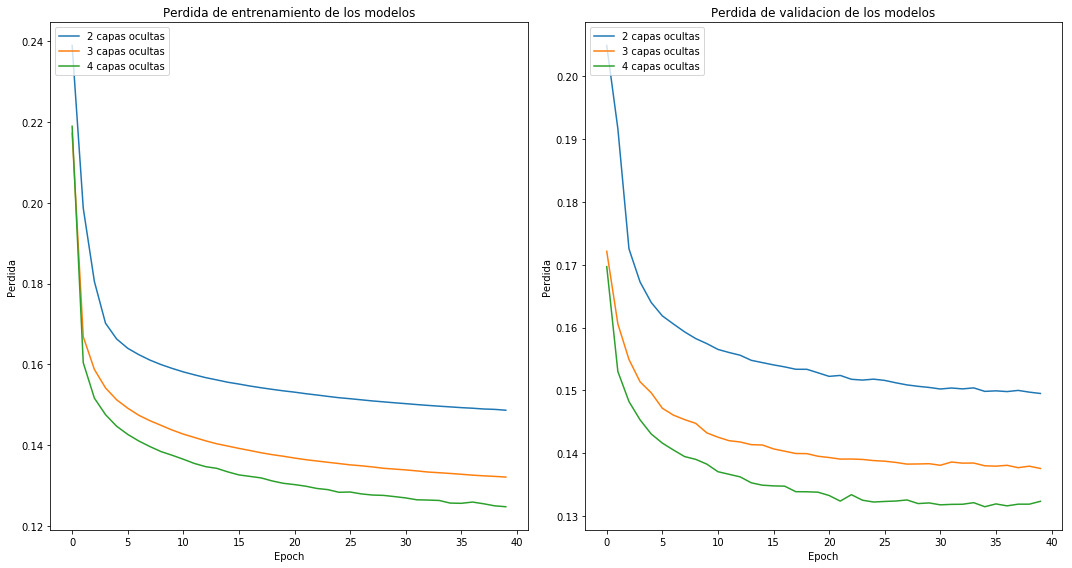

d=8


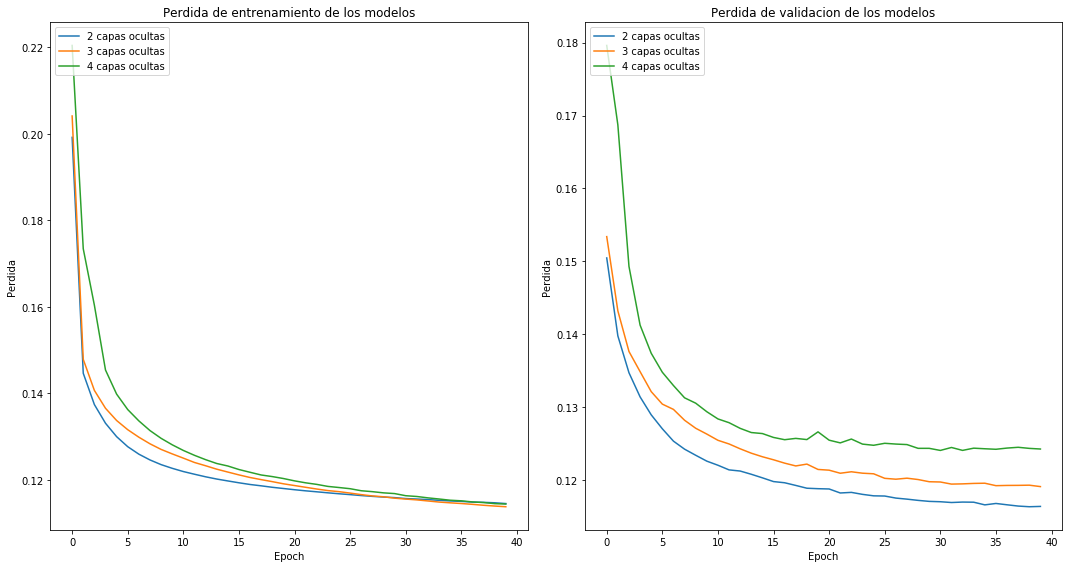

d=16


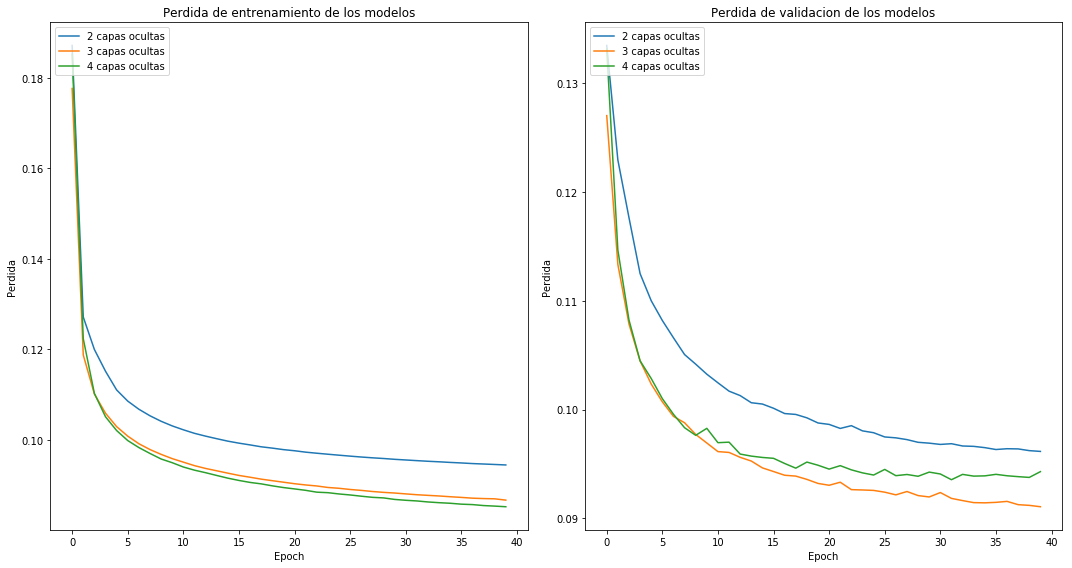

In [58]:
for i in range(4):
    print('d='+str(2**(i+1)))
    mostrarGraficos2(listaHistorias5,i)

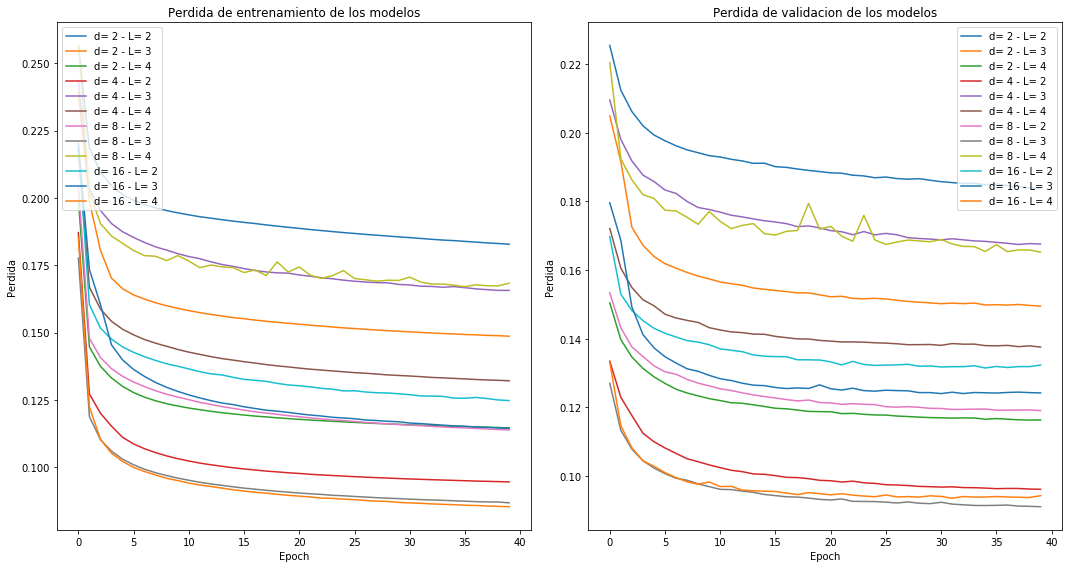

In [59]:
mostrarTodos(listaHistorias5)

In [60]:
kNeighbors('my_encoder5')

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
Classification Accuracy PCA 0.44
Tiempo de ejecución PCA: 0.06 seg
Classification Accuracy 0.69, L=2
Classification Accuracy 0.80, L=3
Classification Accuracy 0.82, L=4
Tiempo de ejecución promedio: 0.06 seg
------------------------------------
d=4
Classification Accuracy PCA 0.65
Tiempo de ejecución PCA: 0.13 seg
Classification Accuracy 0.84, L=2
Classification Accuracy 0.91, L=3
Classification Accuracy 0.94, L=4
Tiempo de ejecución promedio: 0.13 seg
------------------------------------
d=8
Classification Accuracy PCA 0.90
Tiempo de ejecución PCA: 0.77 seg
Classification Accuracy 0.94, L=2
Classification Accuracy 0.95, L=3
Classification Accuracy 0.95, L=4
Tiempo de ejecución promedio: 0.45 seg
------------------------------------
d=16
Classification Accuracy PCA 0.96
Tiempo de ejecución PCA: 5.16 seg
Classification Accuracy 0.96, L=2
Classification Accuracy 0.97, L=3
Classification Accuracy 0.97, L=4
Tiempo de ejecución promedio: 4.05 seg
------------------------------------


Cambiando la función de pérdida no hay mayores cambios respecto al modelo anterior, repitiéndose el comportamiento observado en todos los modelos (a mayor capa y componentes, mejor desempeño) y siendo mejor en general que el modelo que ocupa SGD y MSE.

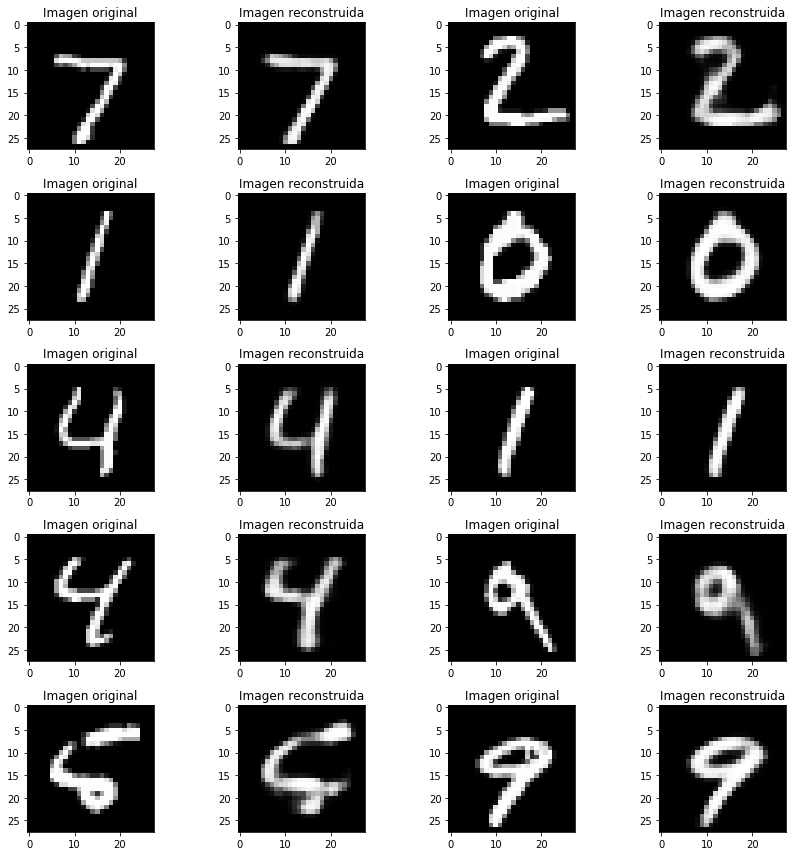

In [141]:
nombre='my_autoencoder5_768x250x16.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])

fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Finalmente comparamos el mejor modelo de cada variación mostrada.

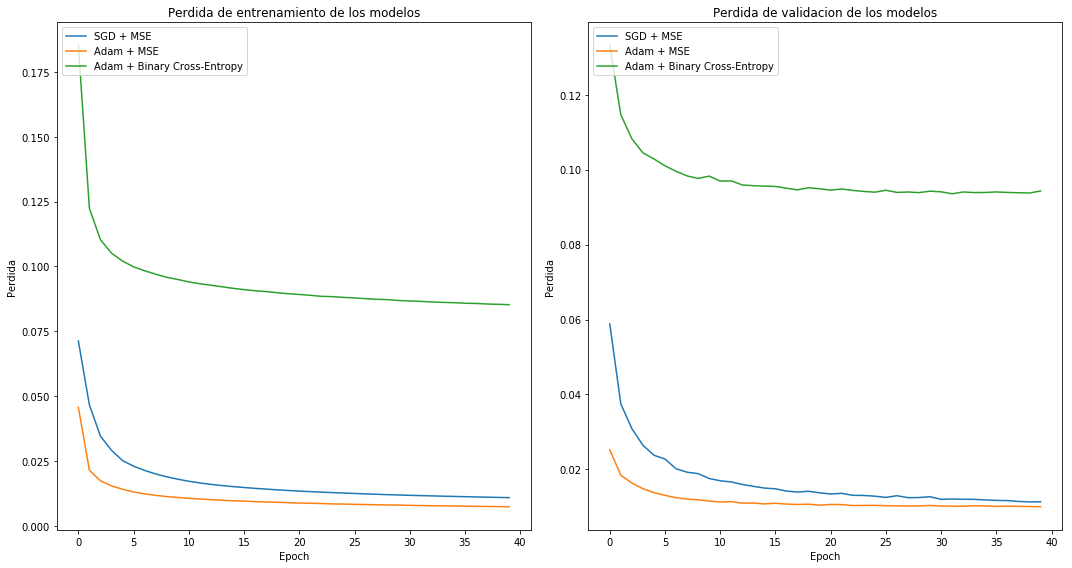

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
ax = axes.flatten()
leg=['SGD + MSE','Adam + MSE','Adam + Binary Cross-Entropy']
ax[0].plot(listaHistorias[2][3].history['loss'])
ax[0].plot(listaHistorias4[2][3].history['loss'])
ax[0].plot(listaHistorias5[2][3].history['loss'])
ax[1].plot(listaHistorias[2][3].history['val_loss'])
ax[1].plot(listaHistorias4[2][3].history['val_loss'])
ax[1].plot(listaHistorias5[2][3].history['val_loss'])
ax[0].set_title('Perdida de entrenamiento de los modelos')
ax[0].set_ylabel('Perdida')
ax[0].set_xlabel('Epoch')
ax[0].legend(leg, loc='upper left')
ax[1].set_title('Perdida de validacion de los modelos')
ax[1].set_ylabel('Perdida')
ax[1].set_xlabel('Epoch')
ax[1].legend(leg, loc='upper left')
plt.tight_layout()
plt.show()

Para los modelos probados, el mejor resulta ser el que utiliza el optimizador Adam y función de pérdida MSE.

Parte e)

Ahora se presenta una forma de poder visualizar la posición relativa de cada uno de las imágenes, usando la clasificación dada por el modelo para asignar los colores y formas.

De este modo se pueden observar las 10 clases distintas de números, del 0 al 9, y la cercanía en lo que respecta su clasificación.

Evaluamos el mejor modelo del ítem anterior, el de 4 capas con 16 componentes.

In [17]:
from sklearn.manifold import TSNE

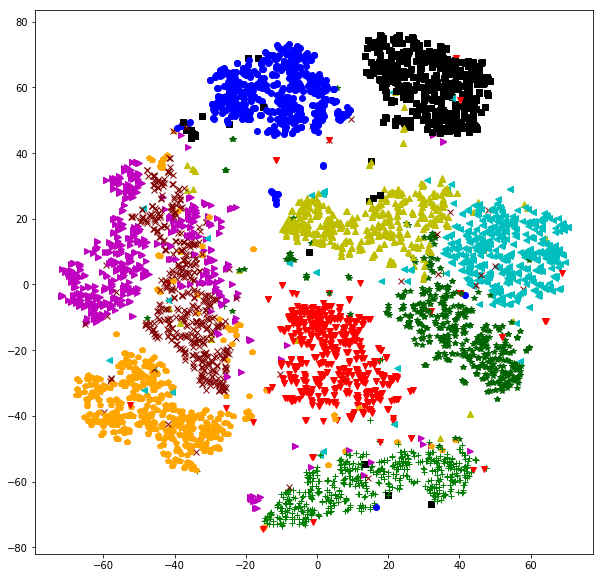

In [110]:
nombre='my_autoencoder4_768x1000x500x250x16.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


En el gráfico se logra apreciar que el conjunto de **4** (flechas a la derecha moradas) y **9** (equis marrones) están altamente entremezcladas, lo que indica que ambas clases son parecidas y fácilmente confundidas por la red neuronal.

Luego se evalúa PCA con 16 componentes.

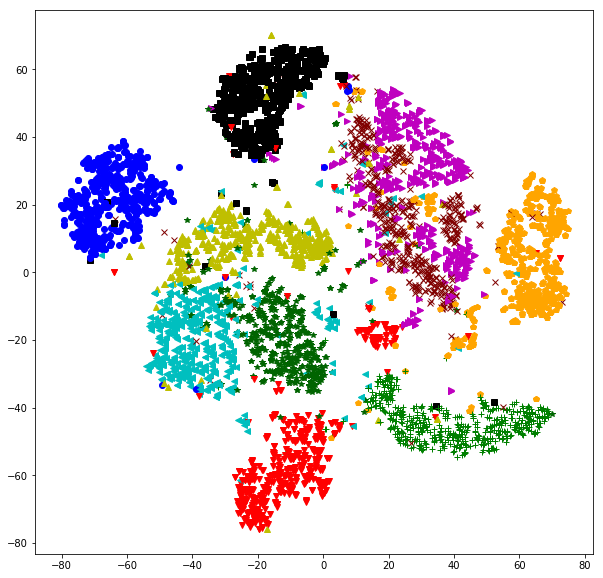

In [111]:
pca = PCA(n_components=16)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

Lo mismo se puede ver en la clasificación con PCA, con **4** y **9** ocupando espacios muy parecidos.

Luego se prueba con 4 componentes, tanto para el modelo de 4 capas como con PCA.

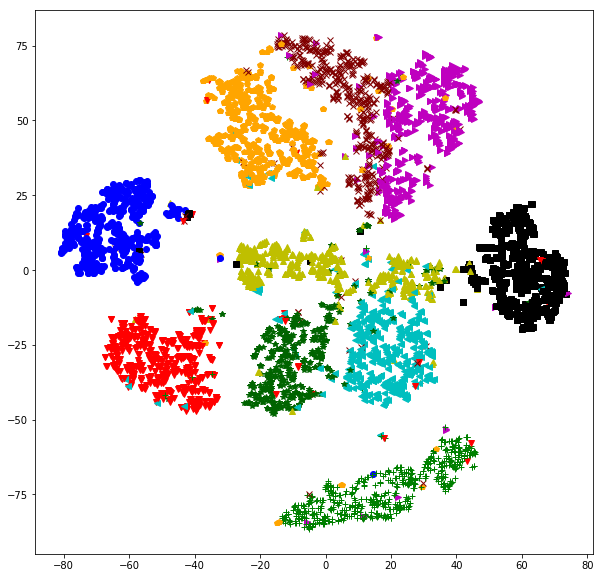

In [143]:
nombre='my_autoencoder4_768x1000x500x250x4.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


La red neuronal construida no tiene mayor dificultad clasificando los números, sin embargo siguen confundiéndose los mismos números.

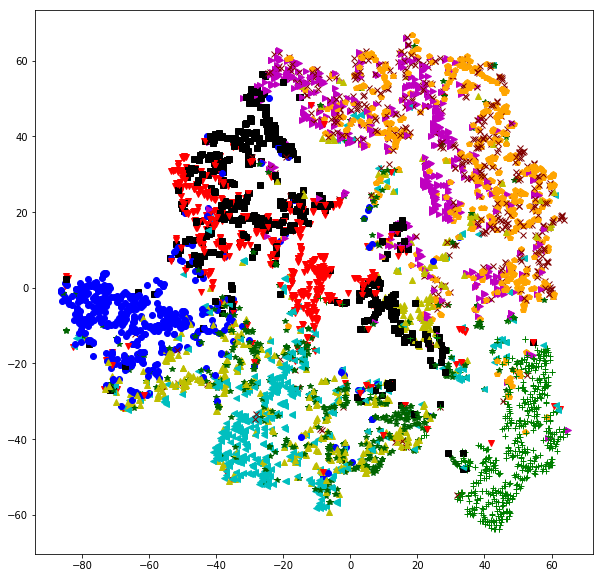

In [145]:
pca = PCA(n_components=4)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

PCA en cambio tiene más problemas para clasificar, presentando una mezcla en todas las distintas clases del conjunto, salvo el **1** (cruces verdes) y el **0** (circulos azules) que están relativamente 'limpios'.

Parte f)

Definimos una función para mostrar los gráficos asociados al entrenamiento.

In [23]:
def resumenGrafico(history):
    if ('acc' in history.history):
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
        ax = axes.flatten()
        ax[0].plot(history.history['loss'])
        ax[0].plot(history.history['val_loss'])
        ax[0].set_title('Perdida del modelo')
        ax[0].set_ylabel('Perdida')
        ax[0].set_xlabel('Epoch')
        ax[0].legend(['Train', 'Val'], loc='upper left')
        ax[1].plot(history.history['acc'])
        ax[1].plot(history.history['val_acc'])
        ax[1].set_title('Precision del modelo')
        ax[1].set_ylabel('Precision')
        ax[1].set_xlabel('Epoch')
        ax[1].legend(['Train', 'Val'], loc='upper left')
    else:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Perdida del modelo')
        plt.ylabel('Perdida')
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [18]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

Re-importamos los sets de entrenamiento y testeo para así conservar la dimensión pedida ($28 \times 28 \times 1$).

In [19]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Luego se construye el modelo indicado por el enunciado.

In [33]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
encoder = Model(input=input_img, output=encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 8)         0         
__________

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  


Posteriormente se entrena.

In [34]:
start = timer()
history=autoencoder.fit(x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
end = timer()
print("Tiempo de ejecución: {} seg".format(end - start))
autoencoder.save('conv_autoencoder.h5')
encoder.save('conv_encoder.h5')

Tiempo de ejecución: 182.39618482099968 seg


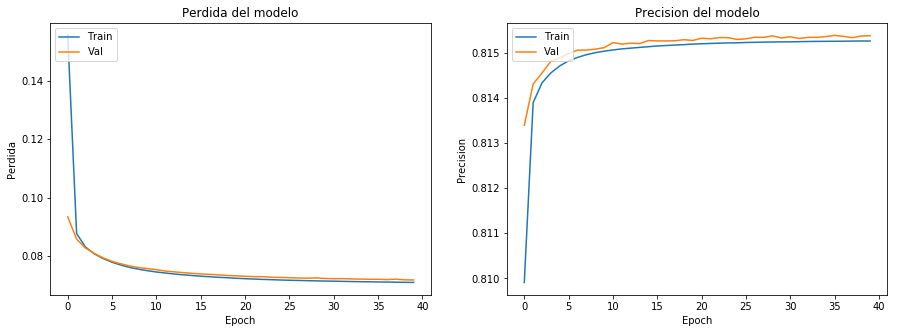

In [35]:
resumenGrafico(history)

Utilizar el criterio de los k-vecinos no hace sentido en el análisis de este modelo debido a que la versión codificada de la imagen posee más canales por cómo funciona el modelo convolucional, por lo que no se posee una sola imagen precisamente si no múltiples feature maps.

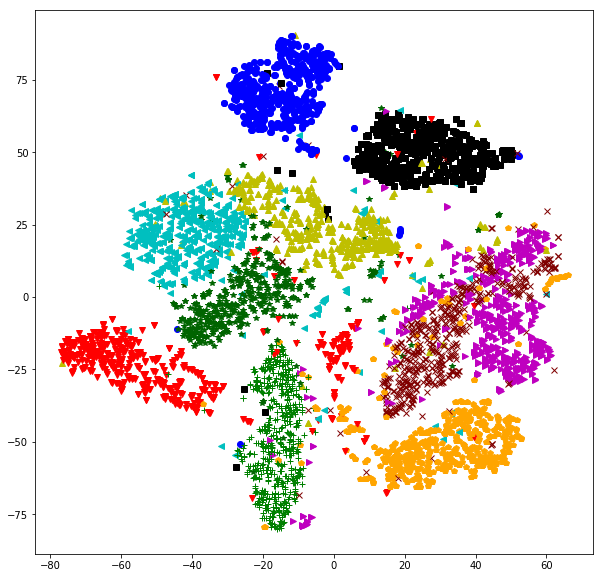

In [36]:
nombre='conv_autoencoder.h5'
autoencoder = load_model(nombre)
nplot=5000 #warning: mind your memory!
encoded_train = autoencoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(np.reshape(encoded_train,(5000,784)))
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

En base al gráfico, el modelo logra diferenciar las clases con una eficiencia similar a los modelos anteriores, quizá con un poco mayor de dificultad pues se presentan (aunque a un bajo nivel) en todos los grupos clasificaciones mezcladas.

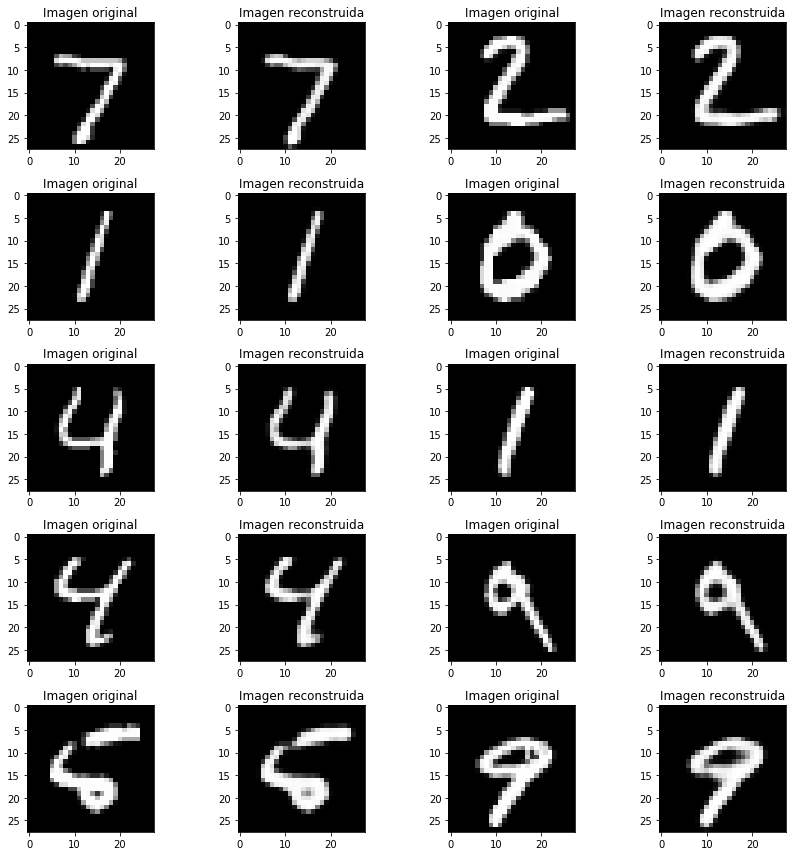

In [37]:
nombre='conv_autoencoder.h5'
autoencoder = load_model(nombre)
output=autoencoder.predict(x_test[0:10])
fig=plt.figure(figsize=(12,12))
rows=5
columns=4
j=0
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    if(i%2==1):
        plt.title('Imagen original')
        plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
    elif(i%2==0):
        plt.title('Imagen reconstruida')
        plt.imshow(output[j].reshape((28,28)),cmap='gray')
        j+=1
plt.tight_layout()
plt.show()

Respecto a la reconstrucción de las imágenes, al menos para el conjunto presentado se observa una decente reconstrucción, incluso haciendo más suaves las curvas respecto a la imagen original.

**Pregunta 3.2**

Parte a)

Primero se obtiene los conjuntos originales de entrenamiento.

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test = x_test.astype('float32') / 255. #and x_test
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Utilizando el código del enunciado, se pueden generar conjuntos corruptos de las imágenes originales.

In [8]:
from numpy.random import binomial

In [67]:
noise_level = 1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

A continuación se presentan un conjunto de imágenes con diferentes niveles de ruido, a modo de comparación.

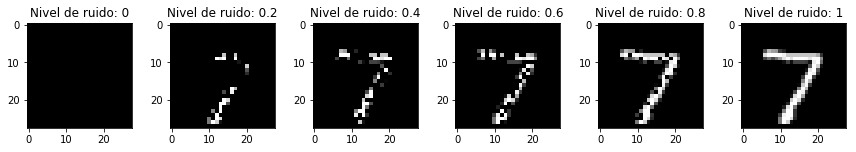

In [10]:
fig=plt.figure(figsize=(12,12))
pes=[0,.2,.4,.6,.8,1]
rows=1
columns=6
j=0
for i in range(1,columns*rows+1):
    noise_level = pes[j]
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    fig.add_subplot(rows,columns,i)
    plt.title('Nivel de ruido: '+str(pes[j]))
    plt.imshow(noisy_x_test[0].reshape((28,28)),cmap='gray')
    j+=1
plt.tight_layout()
plt.show()

Parte b)

Se variará el nivel de ruido, utilizando el modelo con mejor desempeño de la pregunta 3.1.

In [31]:
pes=[.1,.3,.5,.7,.9]
i=0
for noise_level in pes:
    noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    target_dim = 16 #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(target_dim, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(decoded4)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    encoder = Model(input=input_img, output=encoded4)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
    start = timer()
    history=autoencoder.fit(noisy_x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
    end = timer()
    nombre='denoiser'+str(i)+'_1000x500x250x16.h5'
    autoencoder.save(nombre)
    nombre='noiser'+str(i)+'_1000x500x250x16.h5'
    encoder.save(nombre)
    print("Tiempo de ejecución para p={}: {} seg".format(noise_level,end - start))
    i+=1

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para p=0.1: 155.40113217100225 seg
Tiempo de ejecución para p=0.3: 155.61049662899677 seg
Tiempo de ejecución para p=0.5: 162.67659737000213 seg
Tiempo de ejecución para p=0.7: 157.293116593999 seg
Tiempo de ejecución para p=0.9: 158.31977677900068 seg


Definimos una función para cargar los modelos y luego presentar un set de imágenes con los resultados producidos por la red.

In [12]:
def comparacionNoise(i):
    pes=[.1,.3,.5,.7,.9]
    noise_level=pes[i]
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    nombre='denoiser'+str(i)+'_1000x500x250x16.h5'
    autoencoder = load_model(nombre)
    output=autoencoder.predict(noisy_x_test)
    fig=plt.figure(figsize=(12,12))
    rows=5
    columns=6
    j=0
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows,columns,i)
        if(i%3==1):
            plt.title('Imagen original')
            plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==2):
            plt.title('Imagen con ruido')
            plt.imshow(noisy_x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==0):
            plt.title('Imagen reconstruida')
            plt.imshow(output[j].reshape((28,28)),cmap='gray')
            j+=1
    plt.tight_layout()
    plt.show()
    nplot=5000 #warning: mind your memory!
    encoded_train = autoencoder.predict(x_train[:nplot])
    model = TSNE(n_components=2, random_state=0)
    encoded_train = model.fit_transform(encoded_train)
    plt.figure(figsize=(10, 10))
    colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
    markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
    for idx in range(0,nplot):
        label = y_train[idx]
        line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
            color=colors[label], marker=markers[label], markersize=6)

La primera comparación sera la de p=0.1, variando de 0.2 en 0.2.

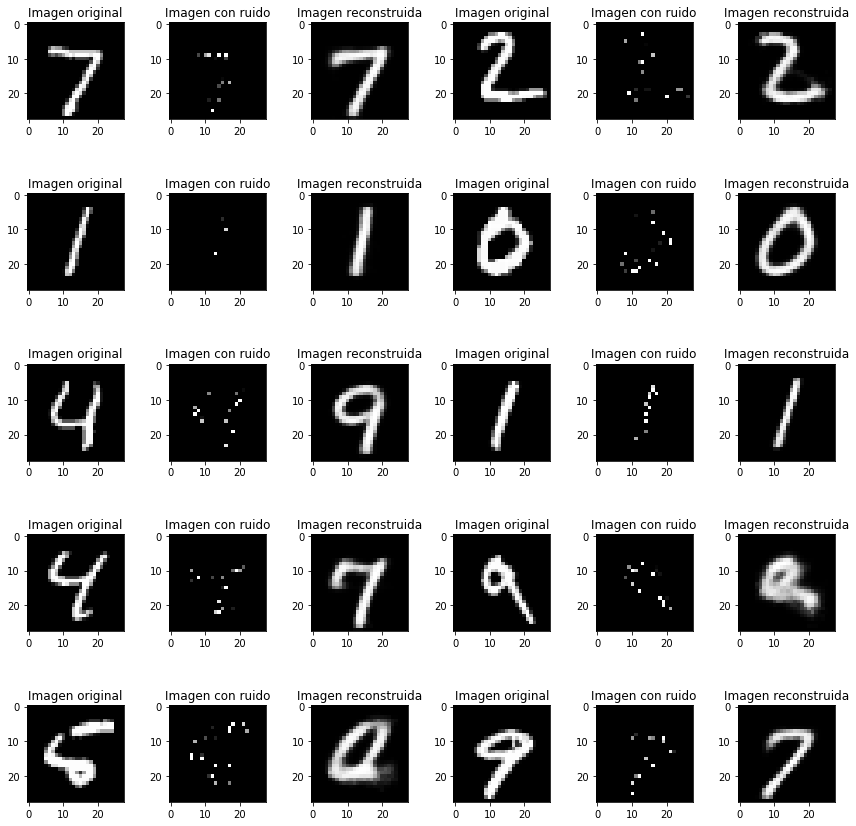

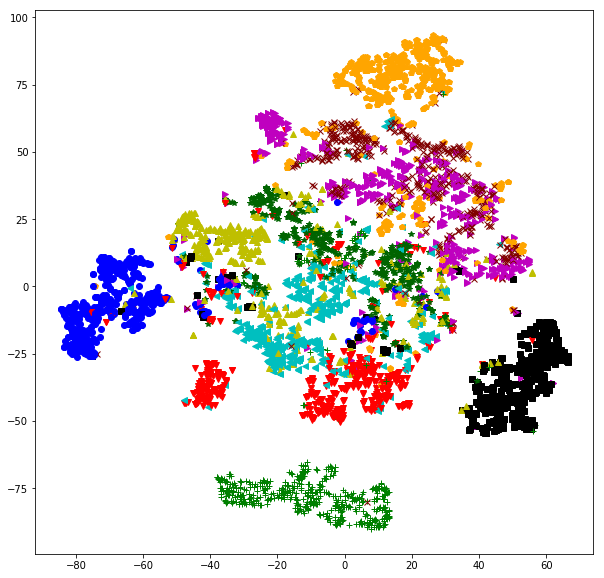

In [21]:
comparacionNoise(0)

Con pocos indicios de cómo es la imagen original, la red solo puede tratar de reconstruir una aproximación que dista bastante de como debería ser, sin embargo claramente reconoce formas básicas como una traza única para identificar un 1, o que puntos que aparentan ser líneas verticales junto a otros puntos paralelos pueden ser un 4 o un 9.

El gráfico siguiente nos da una idea de cómo se reconstruyen las imágenes. Dado que los puntos se ven en general entremezclados, se infiere que la red produce con frecuencia símbolos que son confundibles.

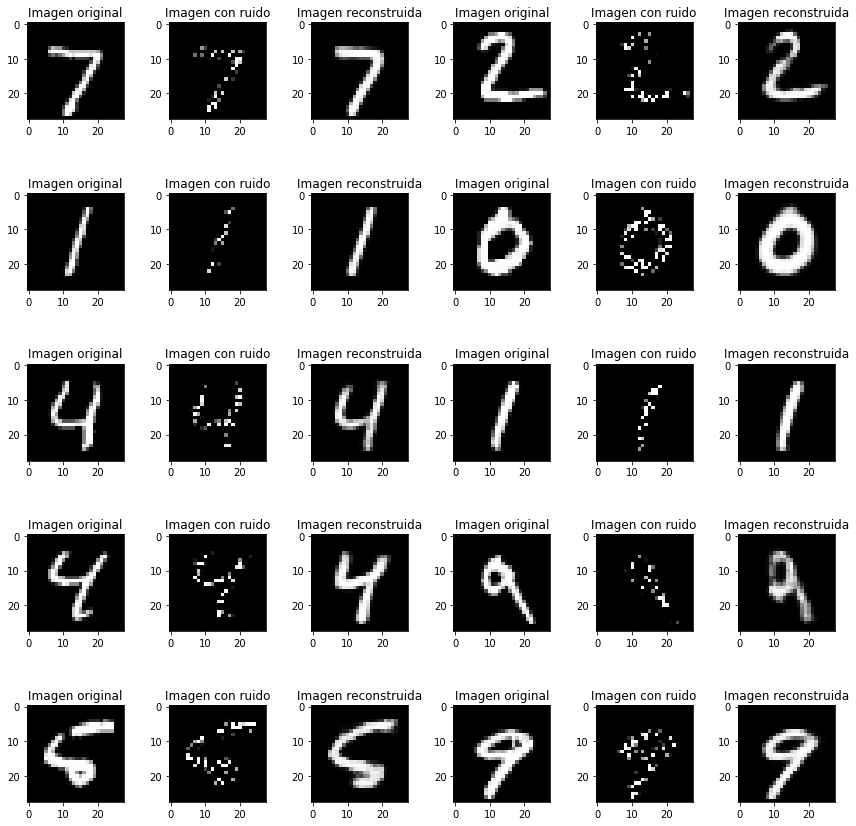

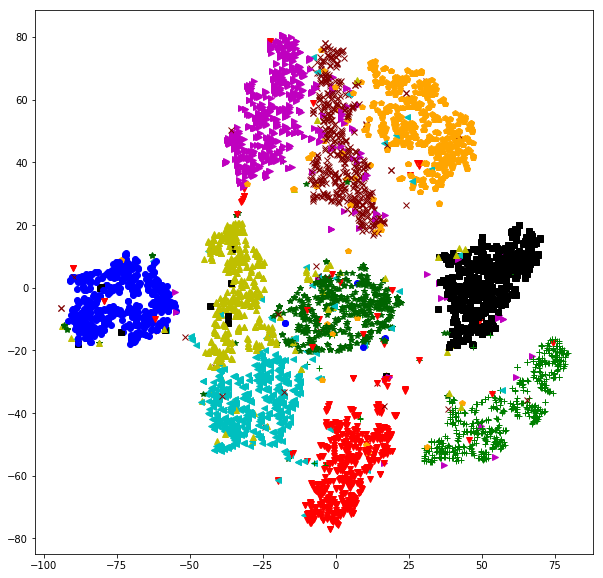

In [22]:
comparacionNoise(1)

Con una imagen un poco más limpia, la red logra reconstruir mucho mejor las imágenes, salvo algunas diferencias marginales. Además, el problema de los puntos entremezclados se soluciona en gran medida por lo que se puede afirmar que la salida de la red neuronal son números más reconocibles.

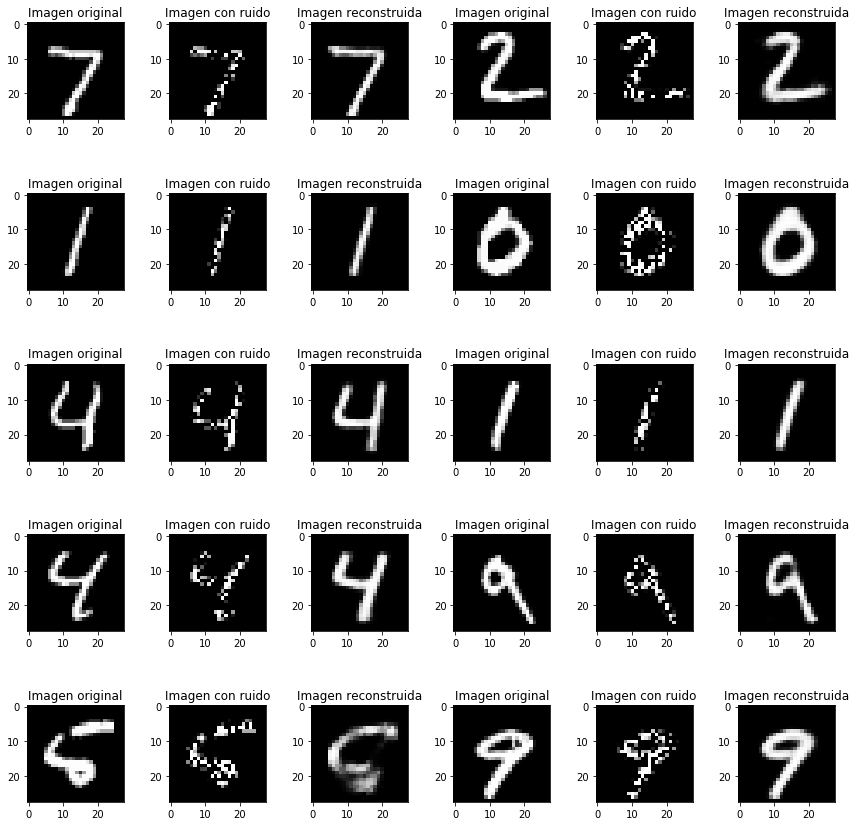

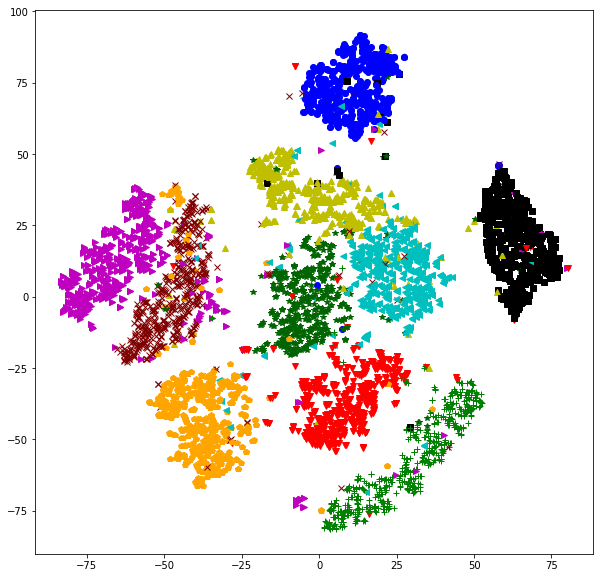

In [23]:
comparacionNoise(2)

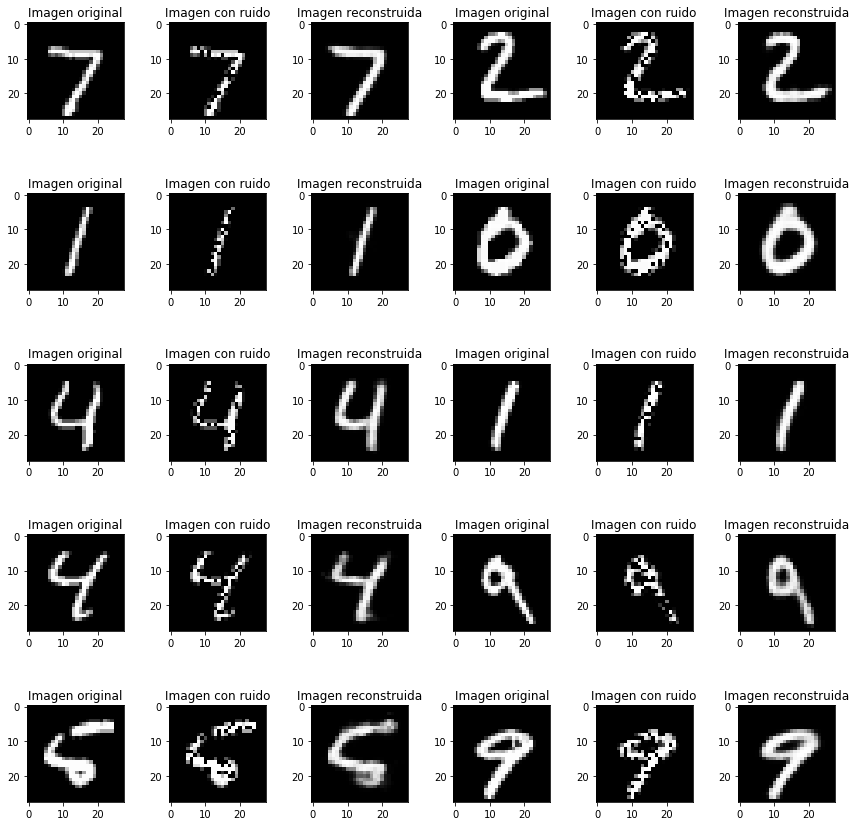

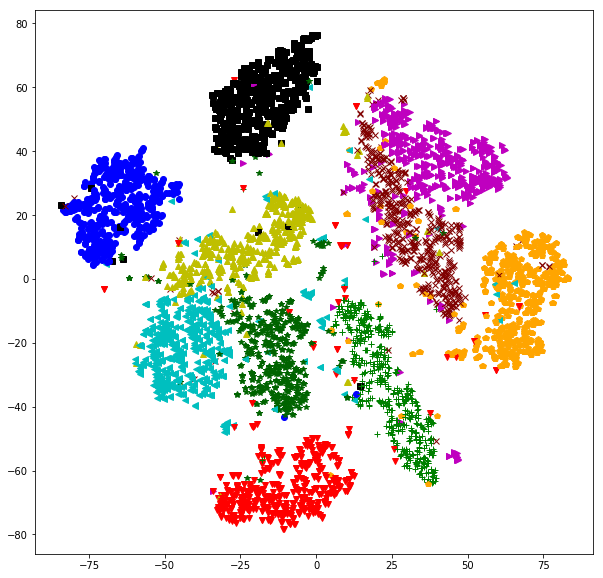

In [24]:
comparacionNoise(3)

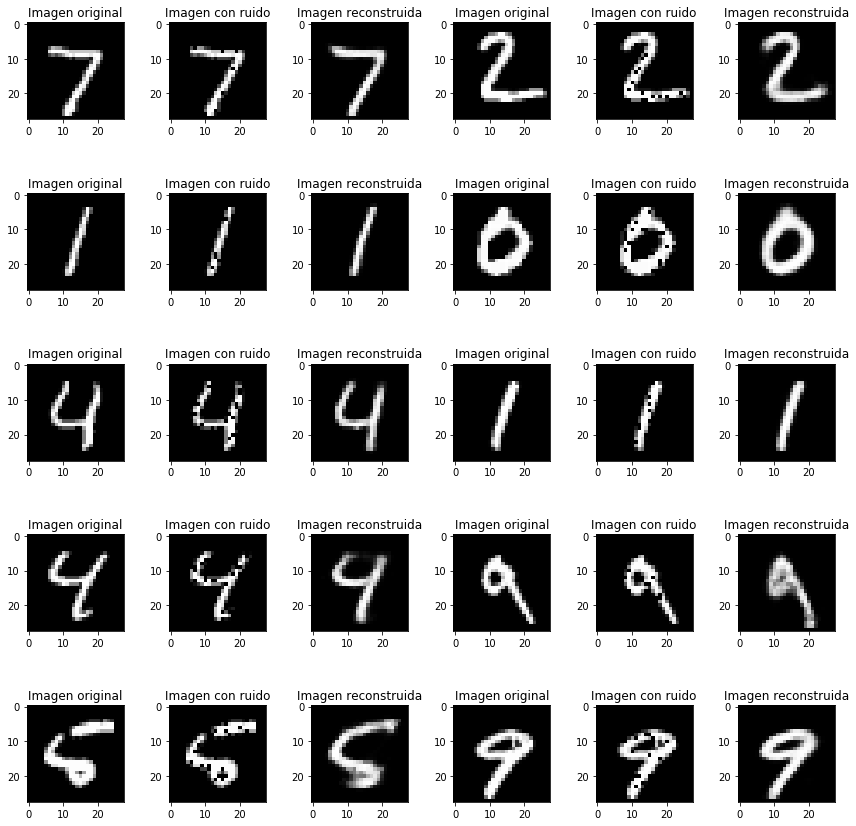

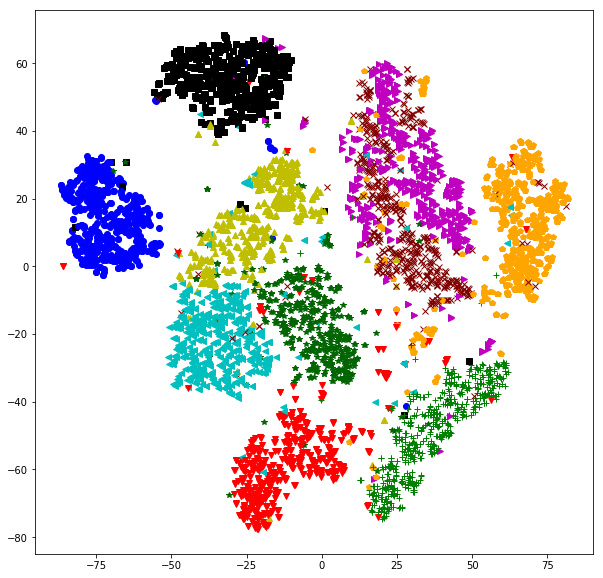

In [25]:
comparacionNoise(4)

Con menor ruido, los resultados son similares a los modelos probados en las preguntas anteriores.

Parte c)

En los entrenamientos anteriores, se guardaron los 'encoders' de los autoencoders, por lo que solo basta con cargarlos.

In [33]:
pes=[.1,.3,.5,.7,.9]
pca = PCA(n_components=16)
#PCA
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
#CLASIFICATION
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
start = timer()
print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
end = timer()
print("Tiempo de ejecución: {} seg".format(end - start))
for i in range(len(pes)):
    #AUTOENCODER
    nombre='noiser'+str(i)+'_1000x500x250x16.h5'
    encoder = load_model(nombre)
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    #CLASIFICATION
    print("p={}".format(pes[i]))
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    start = timer()
    print('Classification Accuracy %.2f' % clf.score(encoded_test,y_test))
    end = timer()
    print("Tiempo de ejecución: {} seg".format(end - start))

Classification Accuracy PCA 0.96
Tiempo de ejecución: 5.681255193001562 seg


/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


p=0.1
Classification Accuracy 0.90
Tiempo de ejecución: 2.1560166650015162 seg
p=0.3
Classification Accuracy 0.95
Tiempo de ejecución: 3.8571215579977434 seg
p=0.5
Classification Accuracy 0.96
Tiempo de ejecución: 4.924214255999686 seg
p=0.7
Classification Accuracy 0.97
Tiempo de ejecución: 5.240725178999128 seg
p=0.9
Classification Accuracy 0.97
Tiempo de ejecución: 7.072883799999545 seg


Con niveles de ruido superiores (siendo un valor menor de p mayor ruido en la imagen) las redes tienen más dificultad para clasificar con precisión las imágenes, lo cuál es esperable, sin embargo de todas formas el puntaje es bastante alto para todos los modelos.

Parte d)

Para corromper las imágenes se utiliza distribución normal para crear una matriz con valores aleatorios los cuales son aplicados en función de la magnitud que indique la variable *noise_level*.

In [57]:
noise_level = 1
noisy_x_train = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noisy_x_test = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
noisy_x_train = np.clip(noisy_x_train, 0., 1.)
noisy_x_test = np.clip(noisy_x_test, 0., 1.)

A continuación se muestran dos imágenes corruptas. Notar que a mayor valor de *noise_level*, mayor es la corrupción, contrario al item anterior.

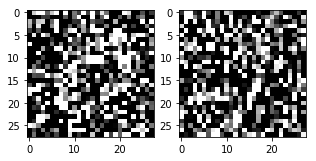

In [58]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(noisy_x_train[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(noisy_x_test[0], (28,28))
plt.imshow(curr_img, cmap='gray')

Las redes son entrenadas con estas nuevas imágenes.

In [59]:
pes=[.1,.3,.5,.7,.9]
i=0
for noise_level in pes:
    noisy_x_train = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    noisy_x_train = np.clip(noisy_x_train, 0., 1.)
    noisy_x_test = np.clip(noisy_x_test, 0., 1.)
    target_dim = 16 #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(target_dim, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(decoded4)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
    start = timer()
    autoencoder.fit(noisy_x_train,x_train,epochs=40,batch_size=128,validation_split=val_percent,verbose=0)
    end = timer()
    nombre='denoiser2'+str(i)+'_1000x500x250x16.h5'
    autoencoder.save(nombre)
    print("Tiempo de ejecución para p={}: {} seg".format(noise_level,end - start))
    i+=1

/home/difroggy/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Tiempo de ejecución para p=0.1: 163.10477622900362 seg
Tiempo de ejecución para p=0.3: 161.93290372999763 seg
Tiempo de ejecución para p=0.5: 162.5980786500004 seg
Tiempo de ejecución para p=0.7: 163.5145763229957 seg
Tiempo de ejecución para p=0.9: 163.53457919000357 seg


Finalmente se define una función para mostrar las salidas de las redes, lado a lado las imagenes corruptas y originales.

In [65]:
def comparacionNoise2(i):
    pes=[.1,.3,.5,.7,.9]
    noise_level=pes[i]
    noisy_x_test = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
    noisy_x_test = np.clip(noisy_x_test, 0., 1.)
    nombre='denoiser2'+str(i)+'_1000x500x250x16.h5'
    autoencoder = load_model(nombre)
    output=autoencoder.predict(noisy_x_test)
    fig=plt.figure(figsize=(12,12))
    rows=5
    columns=6
    j=0
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows,columns,i)
        if(i%3==1):
            plt.title('Imagen original')
            plt.imshow(x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==2):
            plt.title('Imagen con ruido')
            plt.imshow(noisy_x_test[j].reshape((28,28)),cmap='gray')
        elif(i%3==0):
            plt.title('Imagen reconstruida')
            plt.imshow(output[j].reshape((28,28)),cmap='gray')
            j+=1
    plt.tight_layout()
    plt.show()

p=0.1


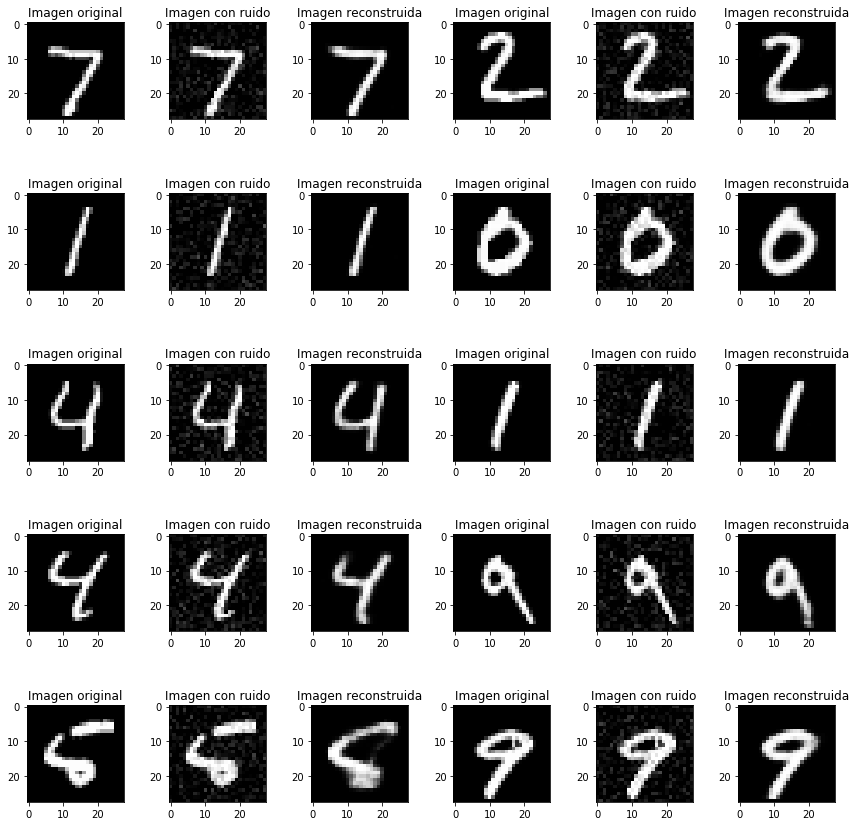

p=0.3


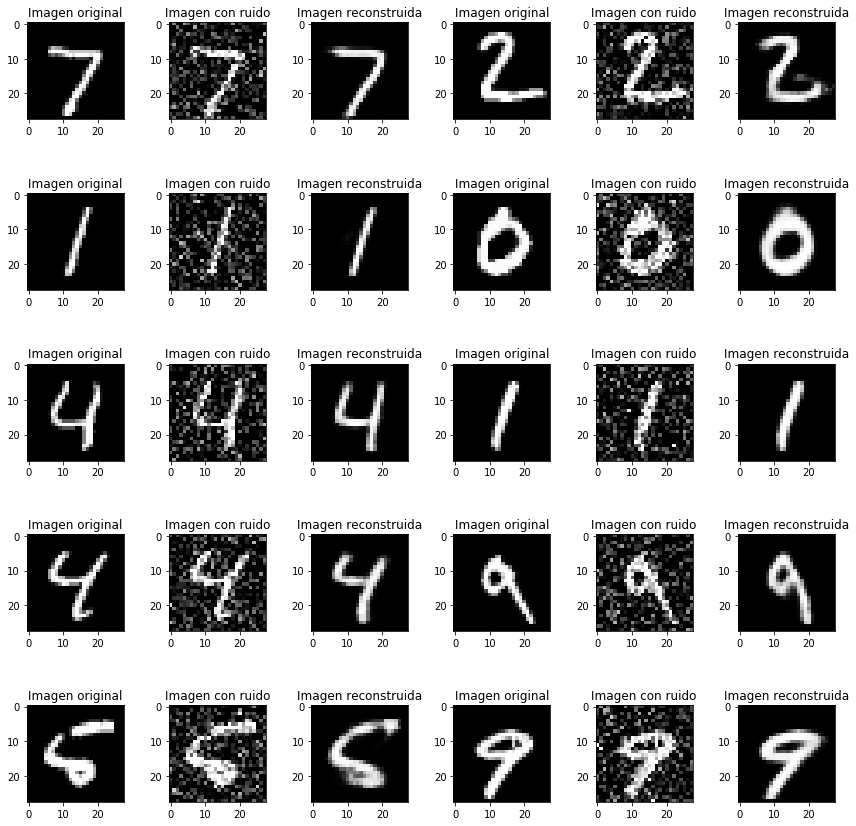

p=0.5


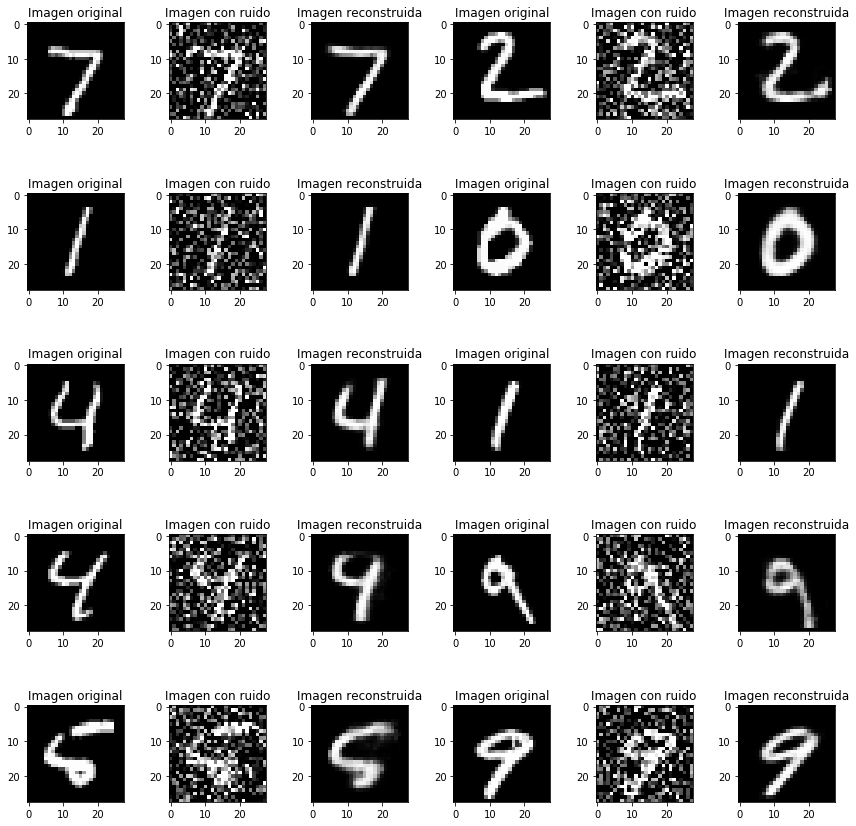

p=0.7


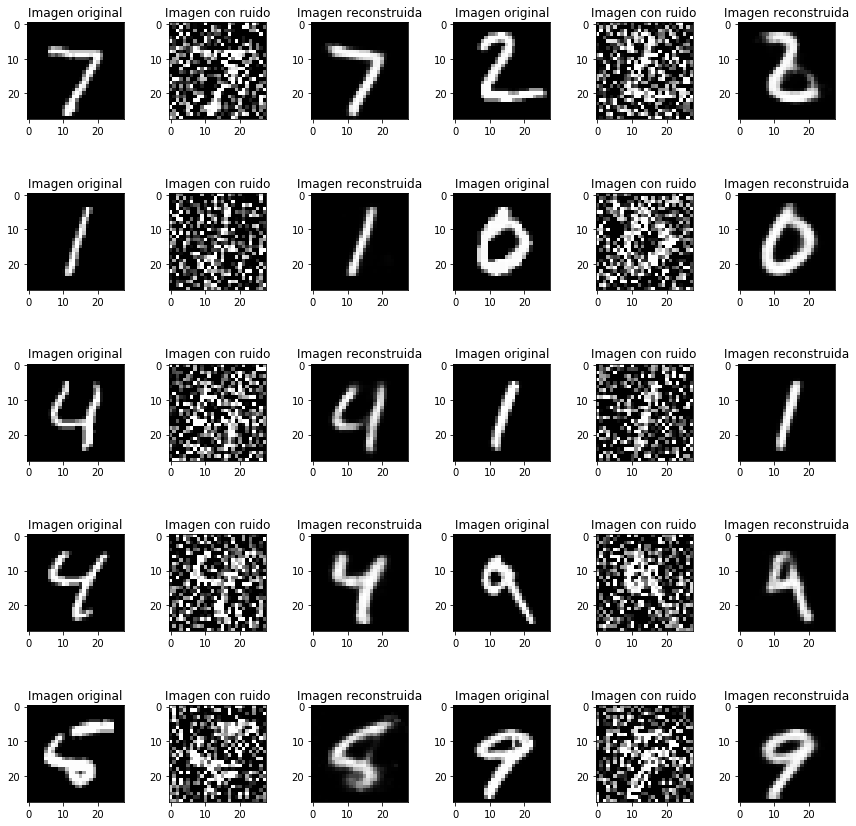

p=0.9


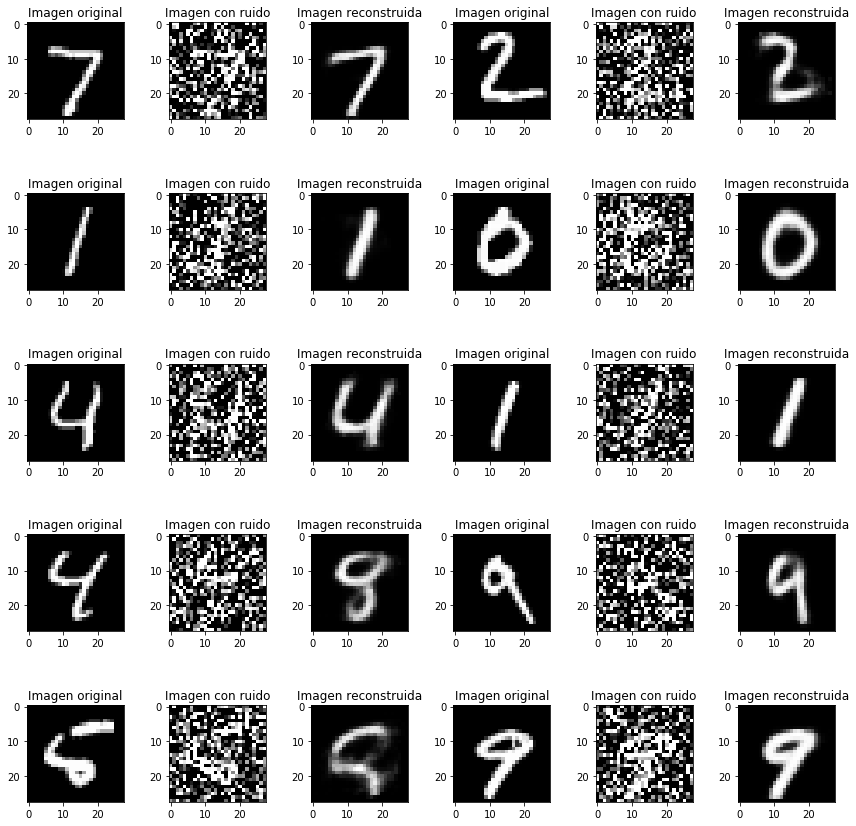

In [67]:
pes=[.1,.3,.5,.7,.9]
for i in range(5):
    print("p="+str(pes[i]))
    comparacionNoise2(i)

La red logra reconstruir muy bien las imágenes observadas, salvo en el último caso donde la corrupción significan productos erróneos. La efectividad de la red se puede atribuir intuitivamente a que a pesar de que las imágenes poseen ruido, las líneas más prominentes corresponden al símbolo original, por lo tanto la red aprende a resaltar estas líneas a aproximaciones de los números aprendidos durante el entrenamiento.